In [54]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns


from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression

from sklearn import metrics, model_selection

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV  

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')

import matplotlib.pyplot as plt

import seaborn as sns

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


In [22]:
df=pd.read_csv("Market+Risk+Dataset.csv")

In [23]:
df.head()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways
0  31-03-2014      264            69                  455        263    68          5543         555           298             83          278
1  07-04-2014      257            68                  458        276    70          5728         610           279             84          303
2  14-04-2014      254            68                  454        270    68          5649         607           279             83          280
3  21-04-2014      253            68                  488        283    68          5692         604           274             83          282
4  28-04-2014      256            65                  482        282    63          5582         611           238             79          243

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [39]:
df['Date']=pd.to_datetime(df['Date'])

In [41]:
df.tail()

Date  Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank  SAIL  Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways      dates
309 2020-02-03      729           120                  469        658    33         23110         401           146              3           22 2020-02-03
310 2020-09-03      634           114                  427        569    30         21308         384           121              6           18 2020-09-03
311 2020-03-16      577            90                  321        428    27         18904         365           105              3           16 2020-03-16
312 2020-03-23      644            75                  293        360    21         17666         338            89              3           14 2020-03-23
313 2020-03-30      633            75                  284        379    23         17546         352            82              3           14 2020-03-30

In [42]:
df.shape

(314, 12)

In [27]:
df.columns

Index(['Date', 'Infosys', 'Indian Hotel', 'Mahindra & Mahindra', 'Axis Bank', 'SAIL', 'Shree Cement', 'Sun Pharma', 'Jindal Steel', 'Idea Vodafone', 'Jet Airways'], dtype='object')

In [43]:
df.isnull().any()

Date                   False
Infosys                False
Indian_Hotel           False
Mahindra_&_Mahindra    False
Axis_Bank              False
SAIL                   False
Shree_Cement           False
Sun_Pharma             False
Jindal_Steel           False
Idea_Vodafone          False
Jet_Airways            False
dates                  False
dtype: bool

In [44]:
df.isnull().sum().sum()

0

In [45]:
df.duplicated().sum().sum()

0

In [46]:
df.columns =df.columns.str.replace(' ', '_').str.replace('.', '')


In [47]:
df.describe().T

count          mean          std     min       25%      50%       75%      max
Infosys              314.0    511.340764   135.952051   234.0    424.00    466.5    630.75    810.0
Indian_Hotel         314.0    114.560510    22.509732    64.0     96.00    115.0    134.00    157.0
Mahindra_&_Mahindra  314.0    636.678344   102.879975   284.0    572.00    625.0    678.00    956.0
Axis_Bank            314.0    540.742038   115.835569   263.0    470.50    528.0    605.25    808.0
SAIL                 314.0     59.095541    15.810493    21.0     47.00     57.0     71.75    104.0
Shree_Cement         314.0  14806.410828  4288.275085  5543.0  10952.25  16018.5  17773.25  24806.0
Sun_Pharma           314.0    633.468153   171.855893   338.0    478.50    614.0    785.00   1089.0
Jindal_Steel         314.0    147.627389    65.879195    53.0     88.25    142.5    182.75    338.0
Idea_Vodafone        314.0     53.713376    31.248985     3.0     25.25     53.0     82.00    117.0
Jet_Airways          314.0    372.659236   202.262668    14.0    243.25    376.0    534.00    871.0

In [48]:
#check the number of rows and columns

print(" number of rows are", df.shape[0])
print(" number of columns are", df.shape[1])

 number of rows are 314
 number of columns are 12


In [49]:
df['dates'] = [pd.to_datetime(d) for d in df['Date']]

In [50]:
df.dtypes.value_counts()


int64             10
datetime64[ns]     2
dtype: int64

In [51]:
df.head()

Date  Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank  SAIL  Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways      dates
0 2014-03-31      264            69                  455        263    68          5543         555           298             83          278 2014-03-31
1 2014-07-04      257            68                  458        276    70          5728         610           279             84          303 2014-07-04
2 2014-04-14      254            68                  454        270    68          5649         607           279             83          280 2014-04-14
3 2014-04-21      253            68                  488        283    68          5692         604           274             83          282 2014-04-21
4 2014-04-28      256            65                  482        282    63          5582         611           238             79          243 2014-04-28

# Q2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference Lets us plot & see price trend over time for different companies


<AxesSubplot:xlabel='dates', ylabel='Infosys'>

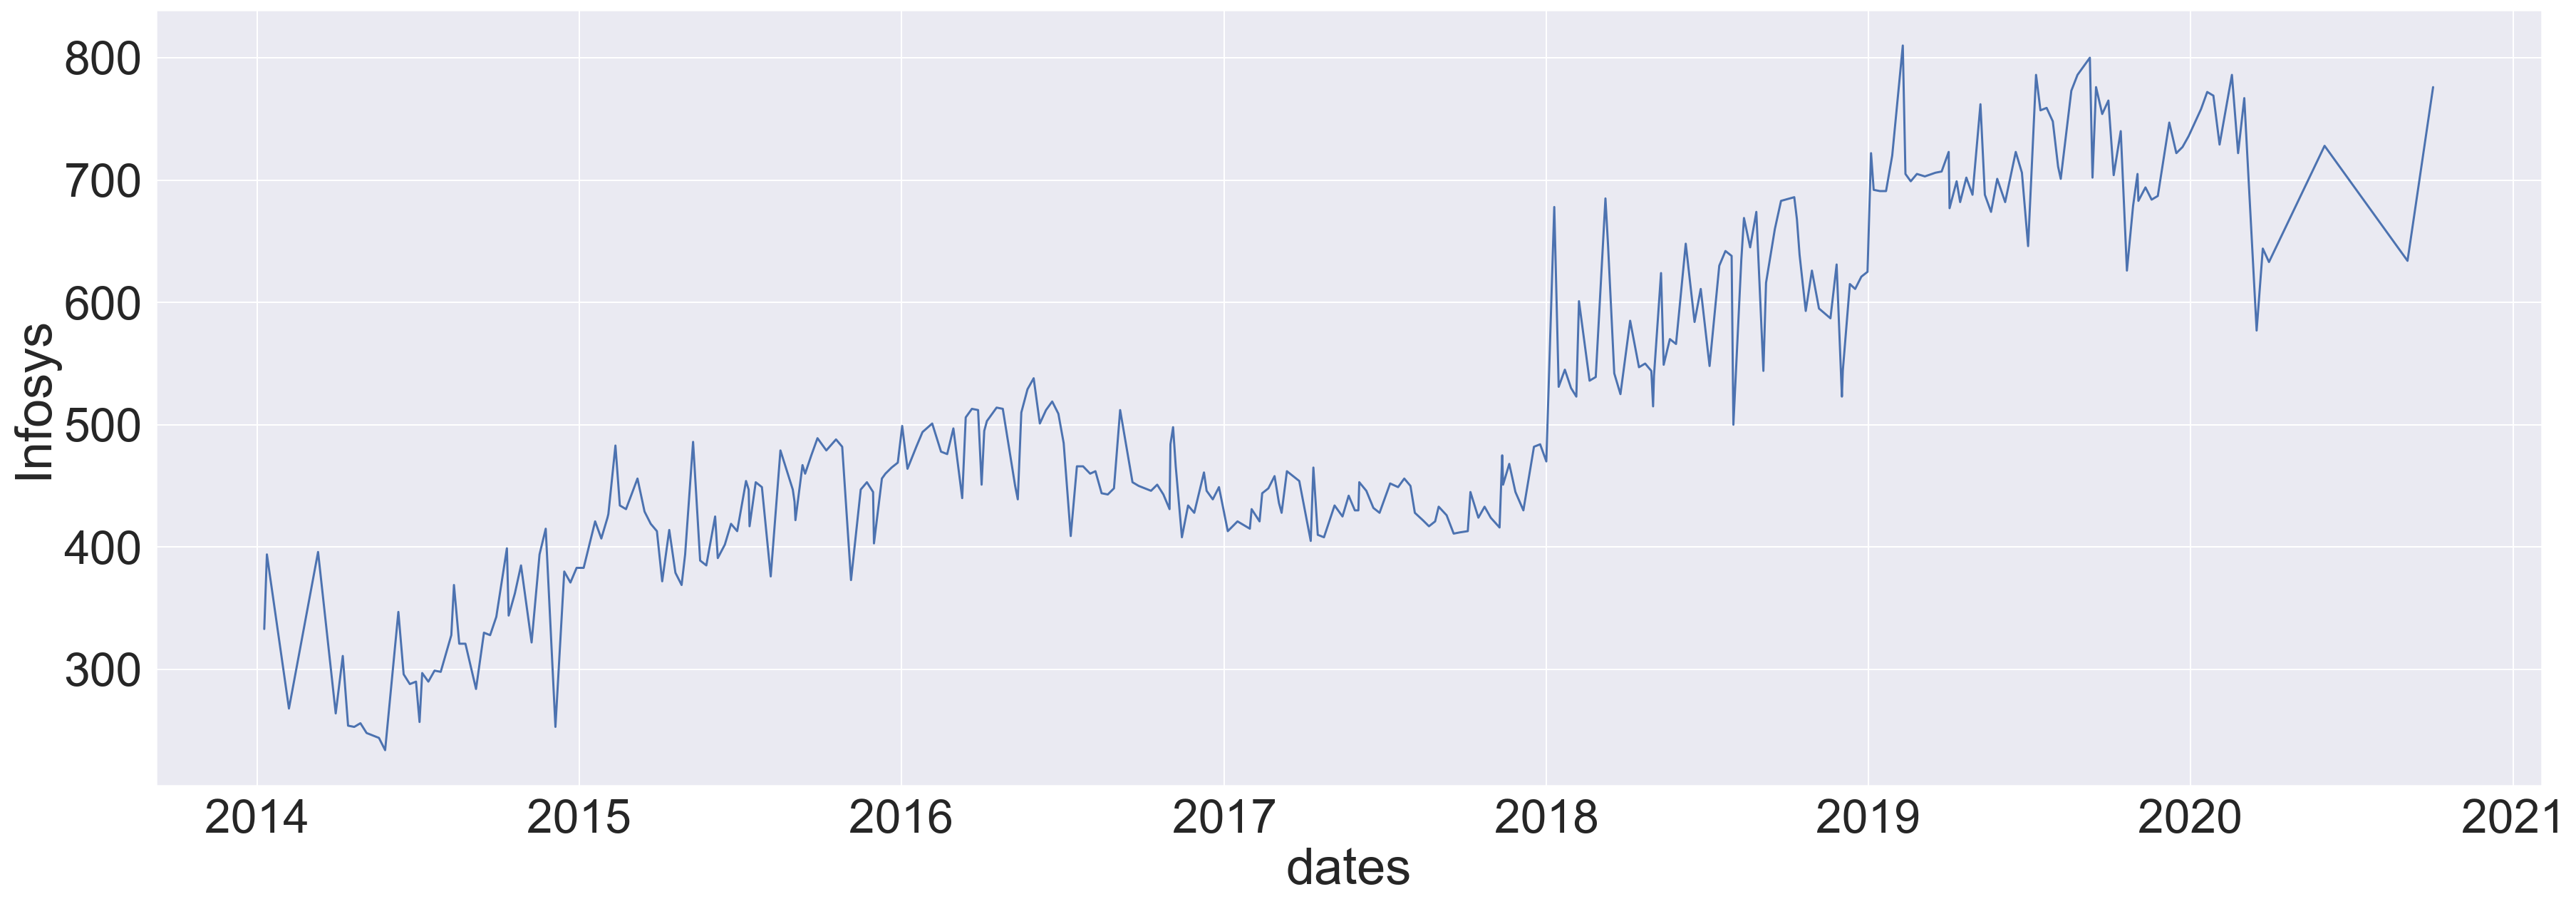

In [78]:

sns.lineplot(x = "dates", y = "Infosys", data=df)
sns.set(font_scale=1)
plt.show()

<Figure size 2160x1080 with 0 Axes>

<AxesSubplot:xlabel='dates', ylabel='Indian_Hotel'>

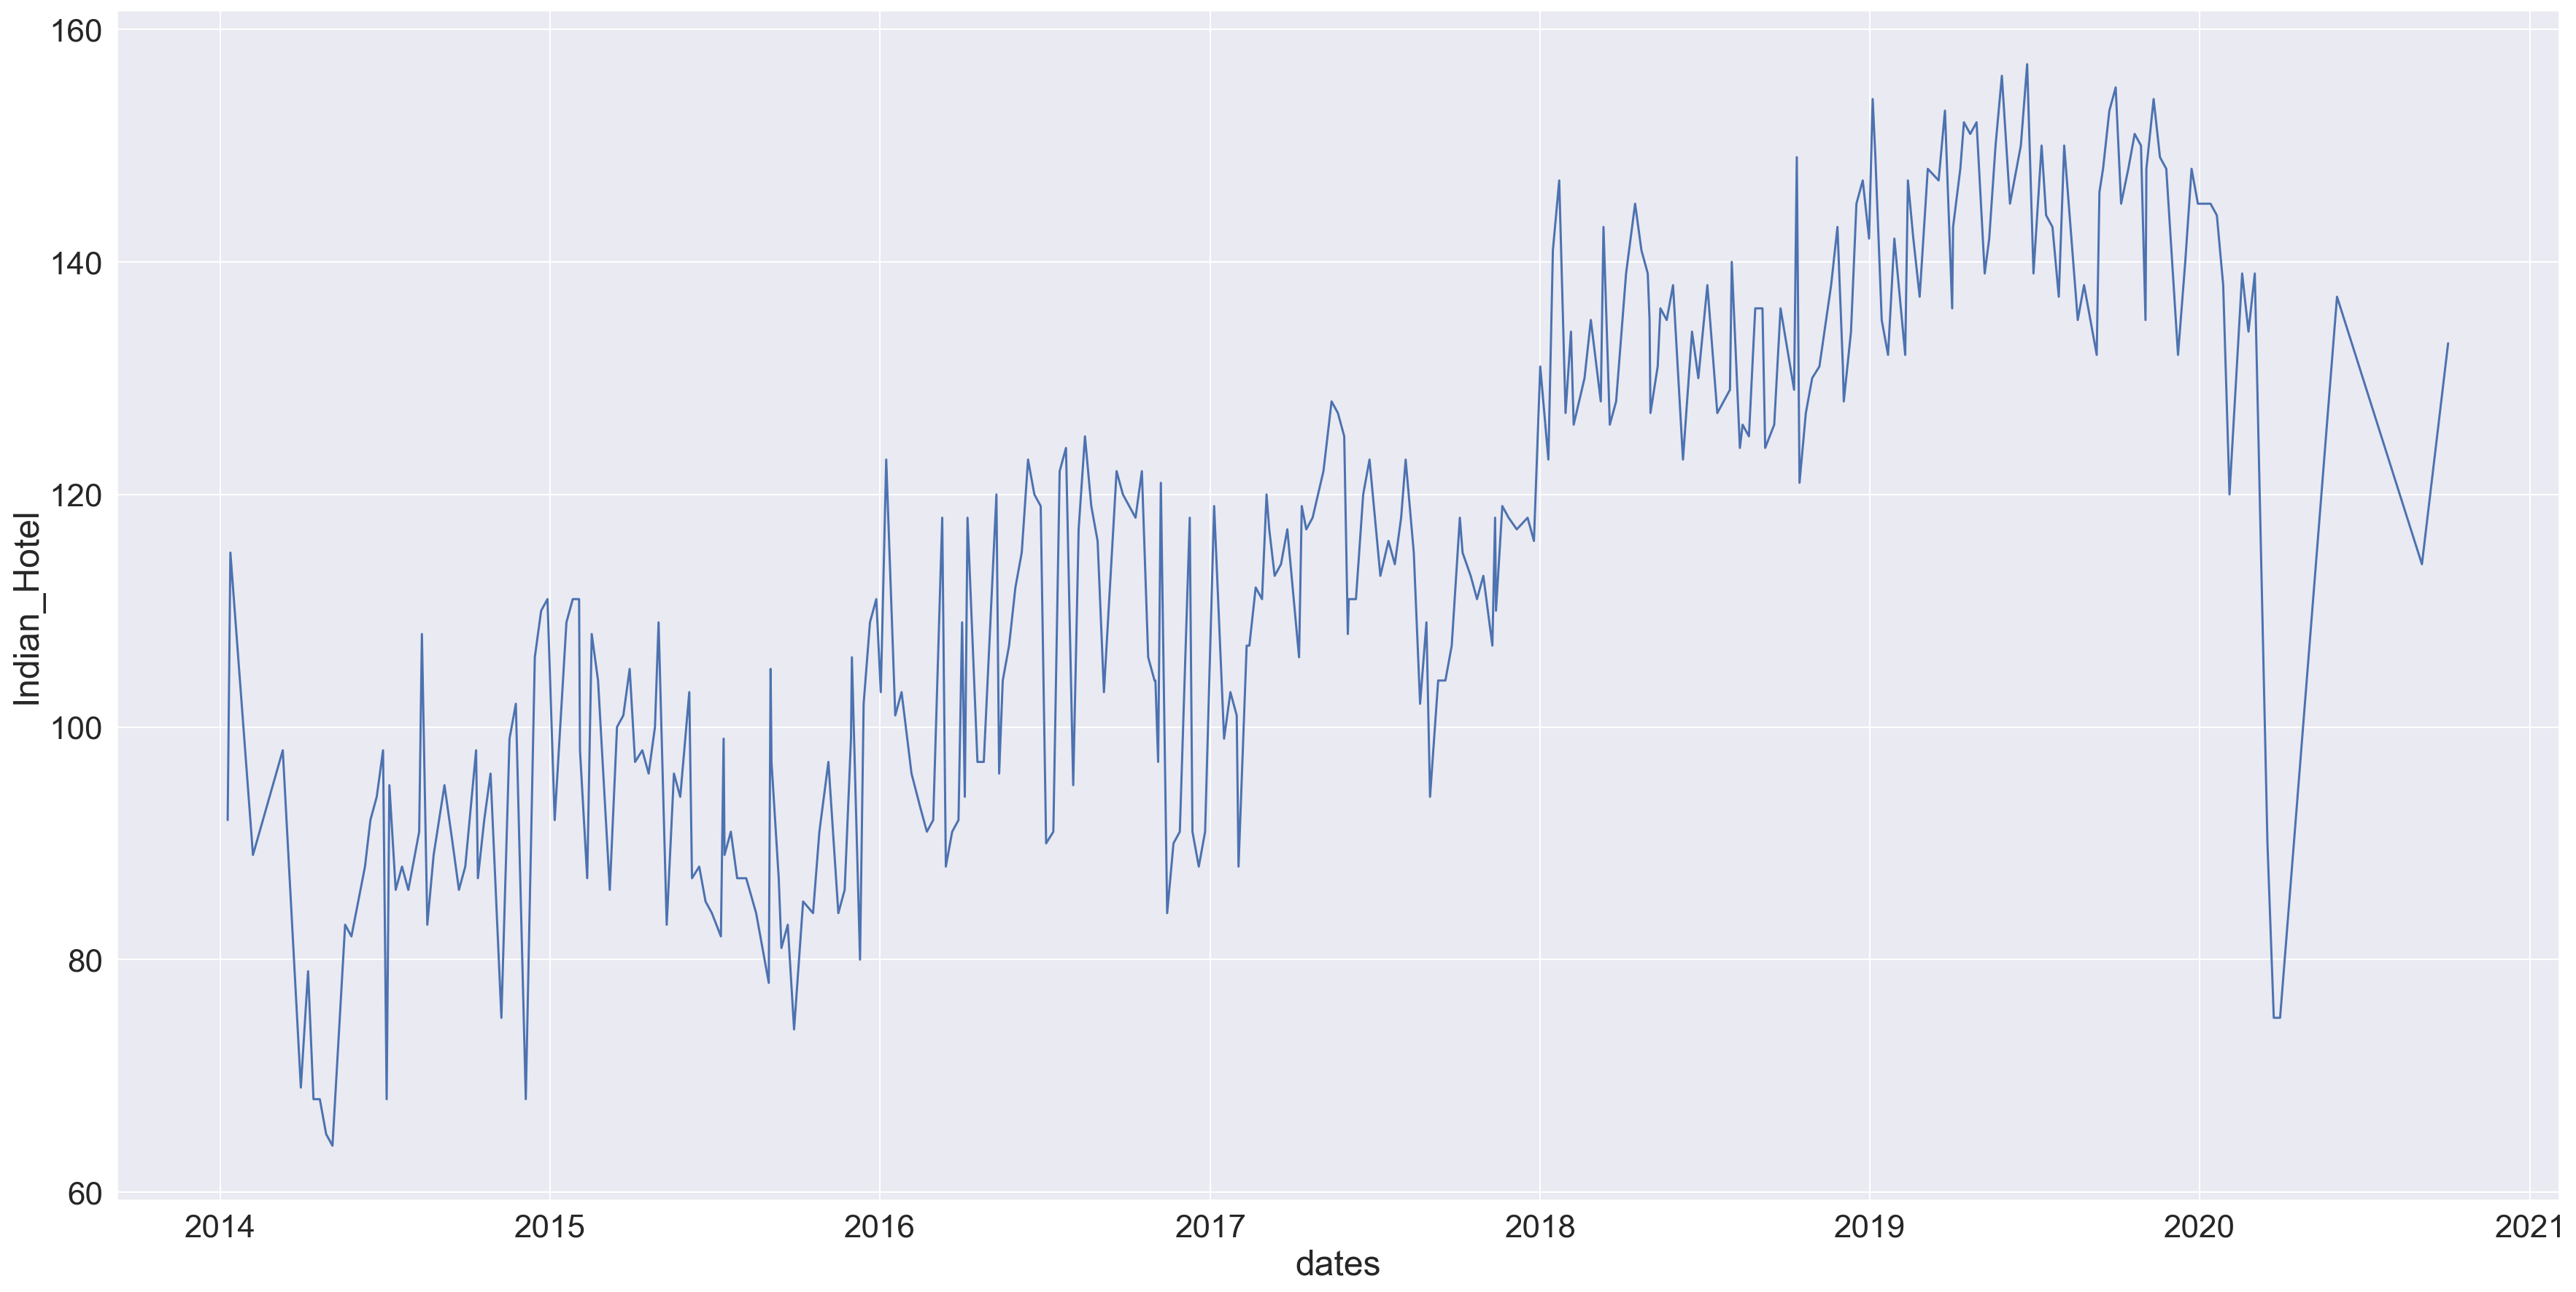

In [83]:
plt.figure(figsize=(30,15))
sns.lineplot(x = "dates", y = "Indian_Hotel", data=df)
sns.set(font_scale=2)
plt.show()

<Figure size 2160x1080 with 0 Axes>

<AxesSubplot:xlabel='dates', ylabel='Mahindra_&_Mahindra'>

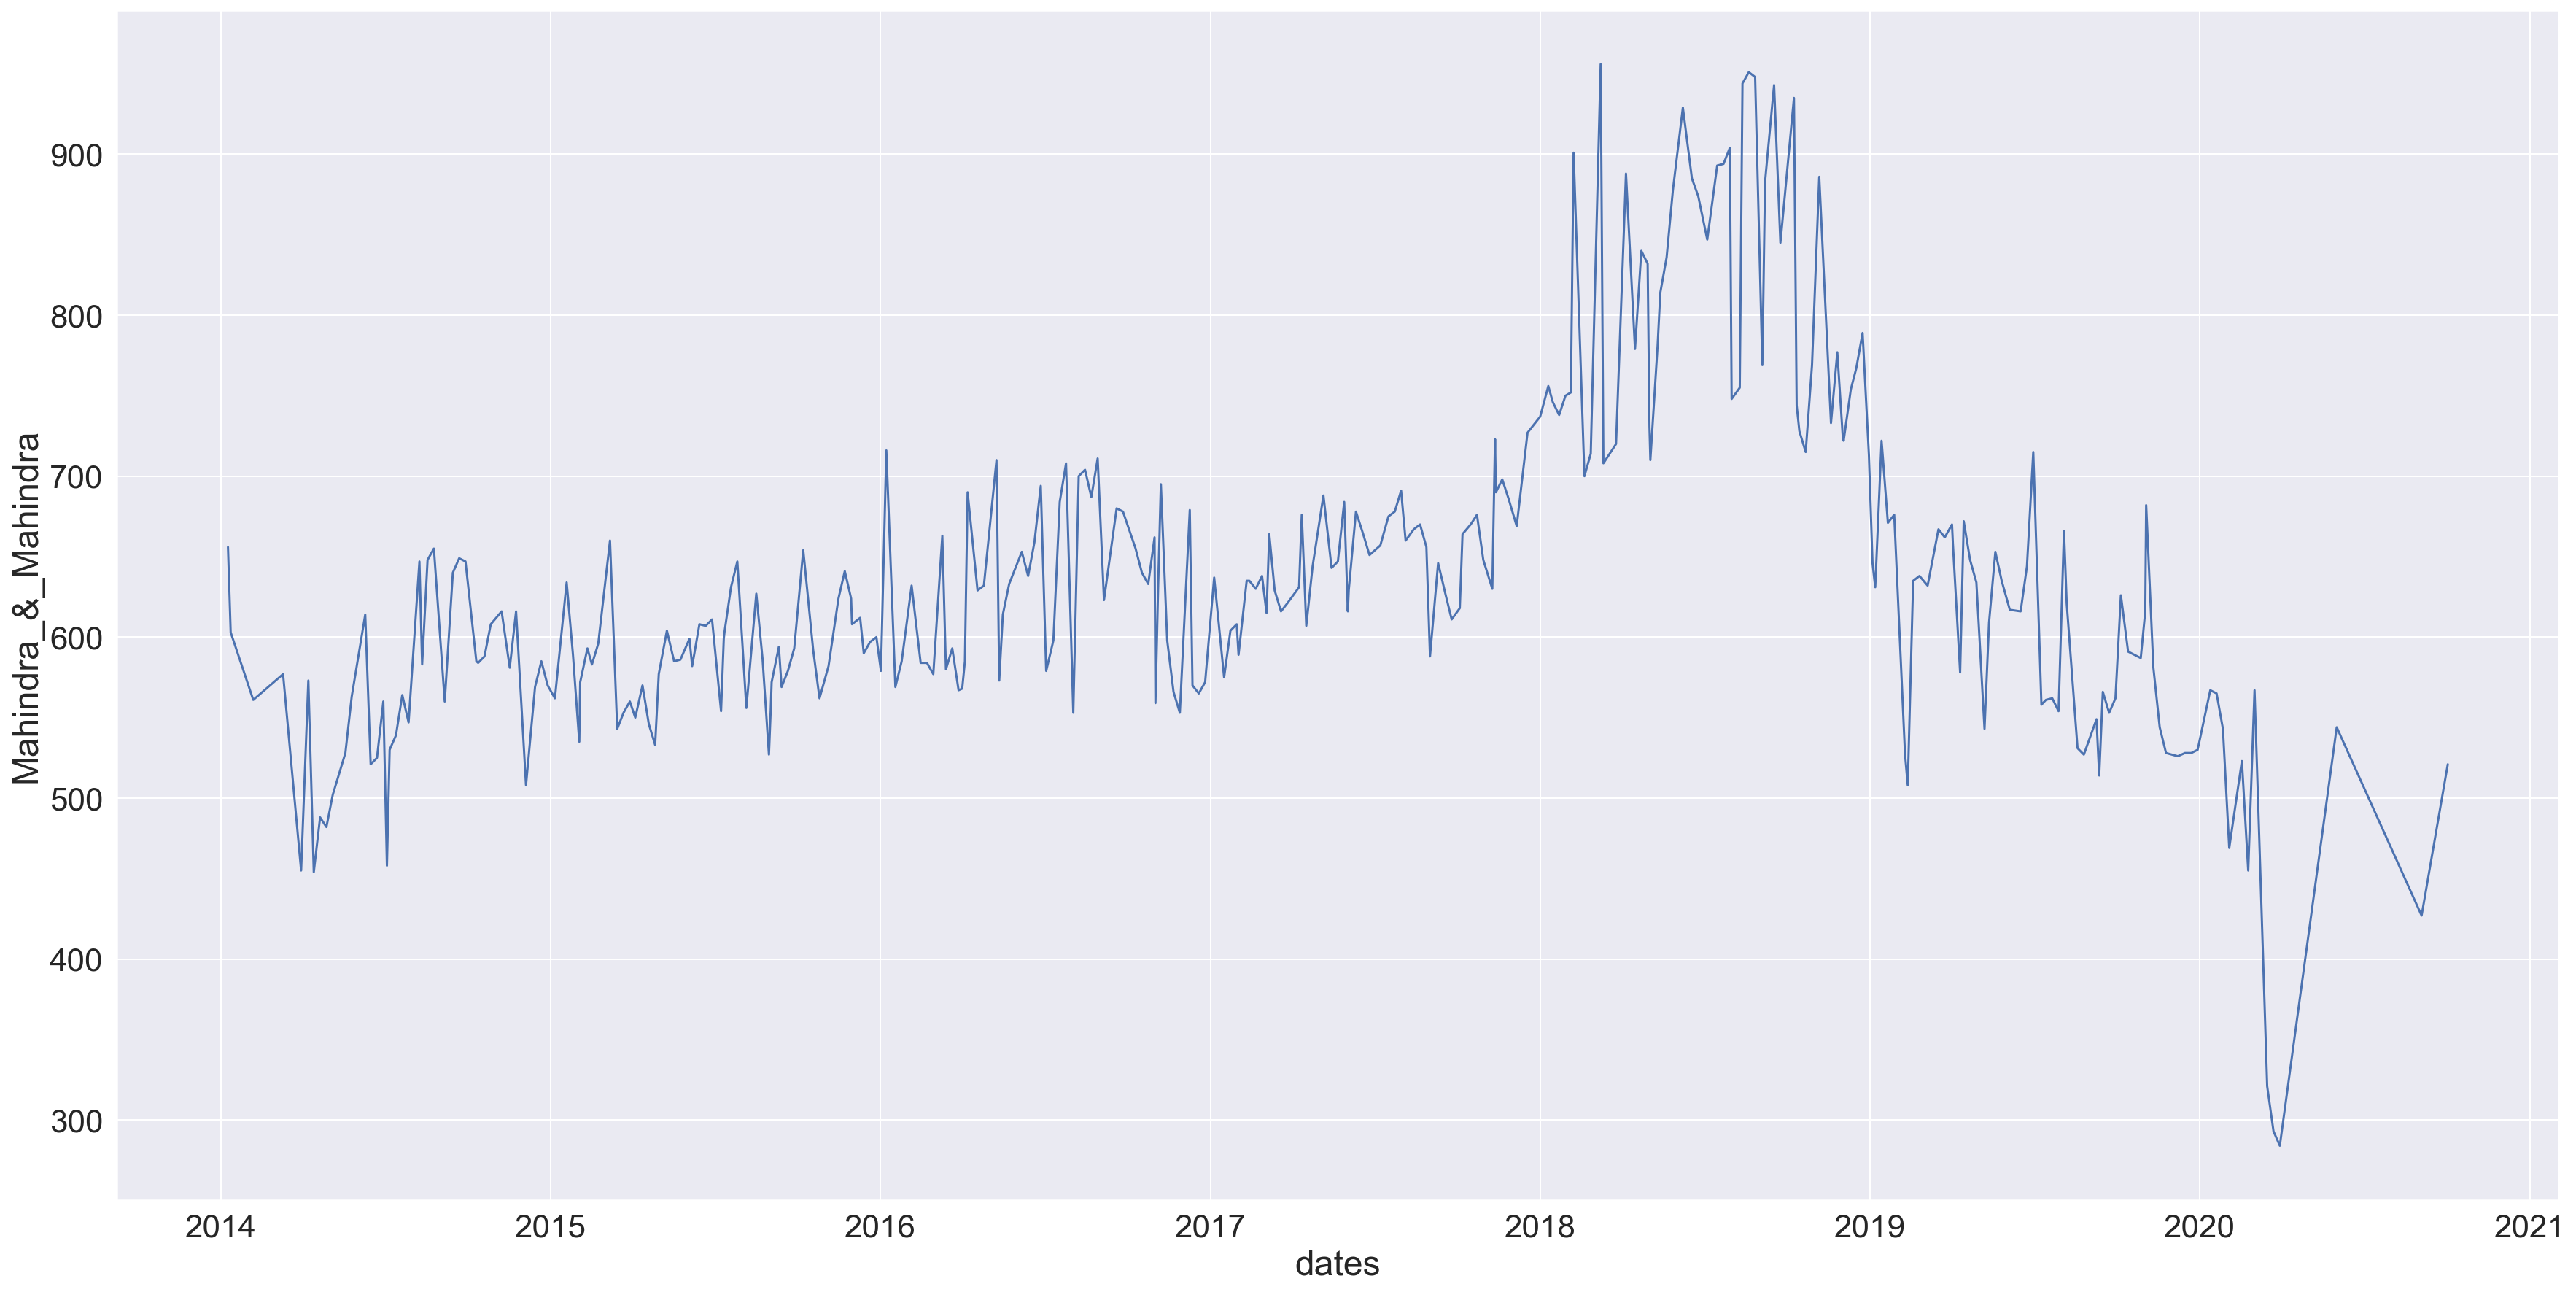

In [84]:
plt.figure(figsize=(30,15))
sns.lineplot(x = "dates", y = "Mahindra_&_Mahindra", data=df)
sns.set(font_scale=2)
plt.show()

<Figure size 2160x1080 with 0 Axes>

<AxesSubplot:xlabel='dates', ylabel='Axis_Bank'>

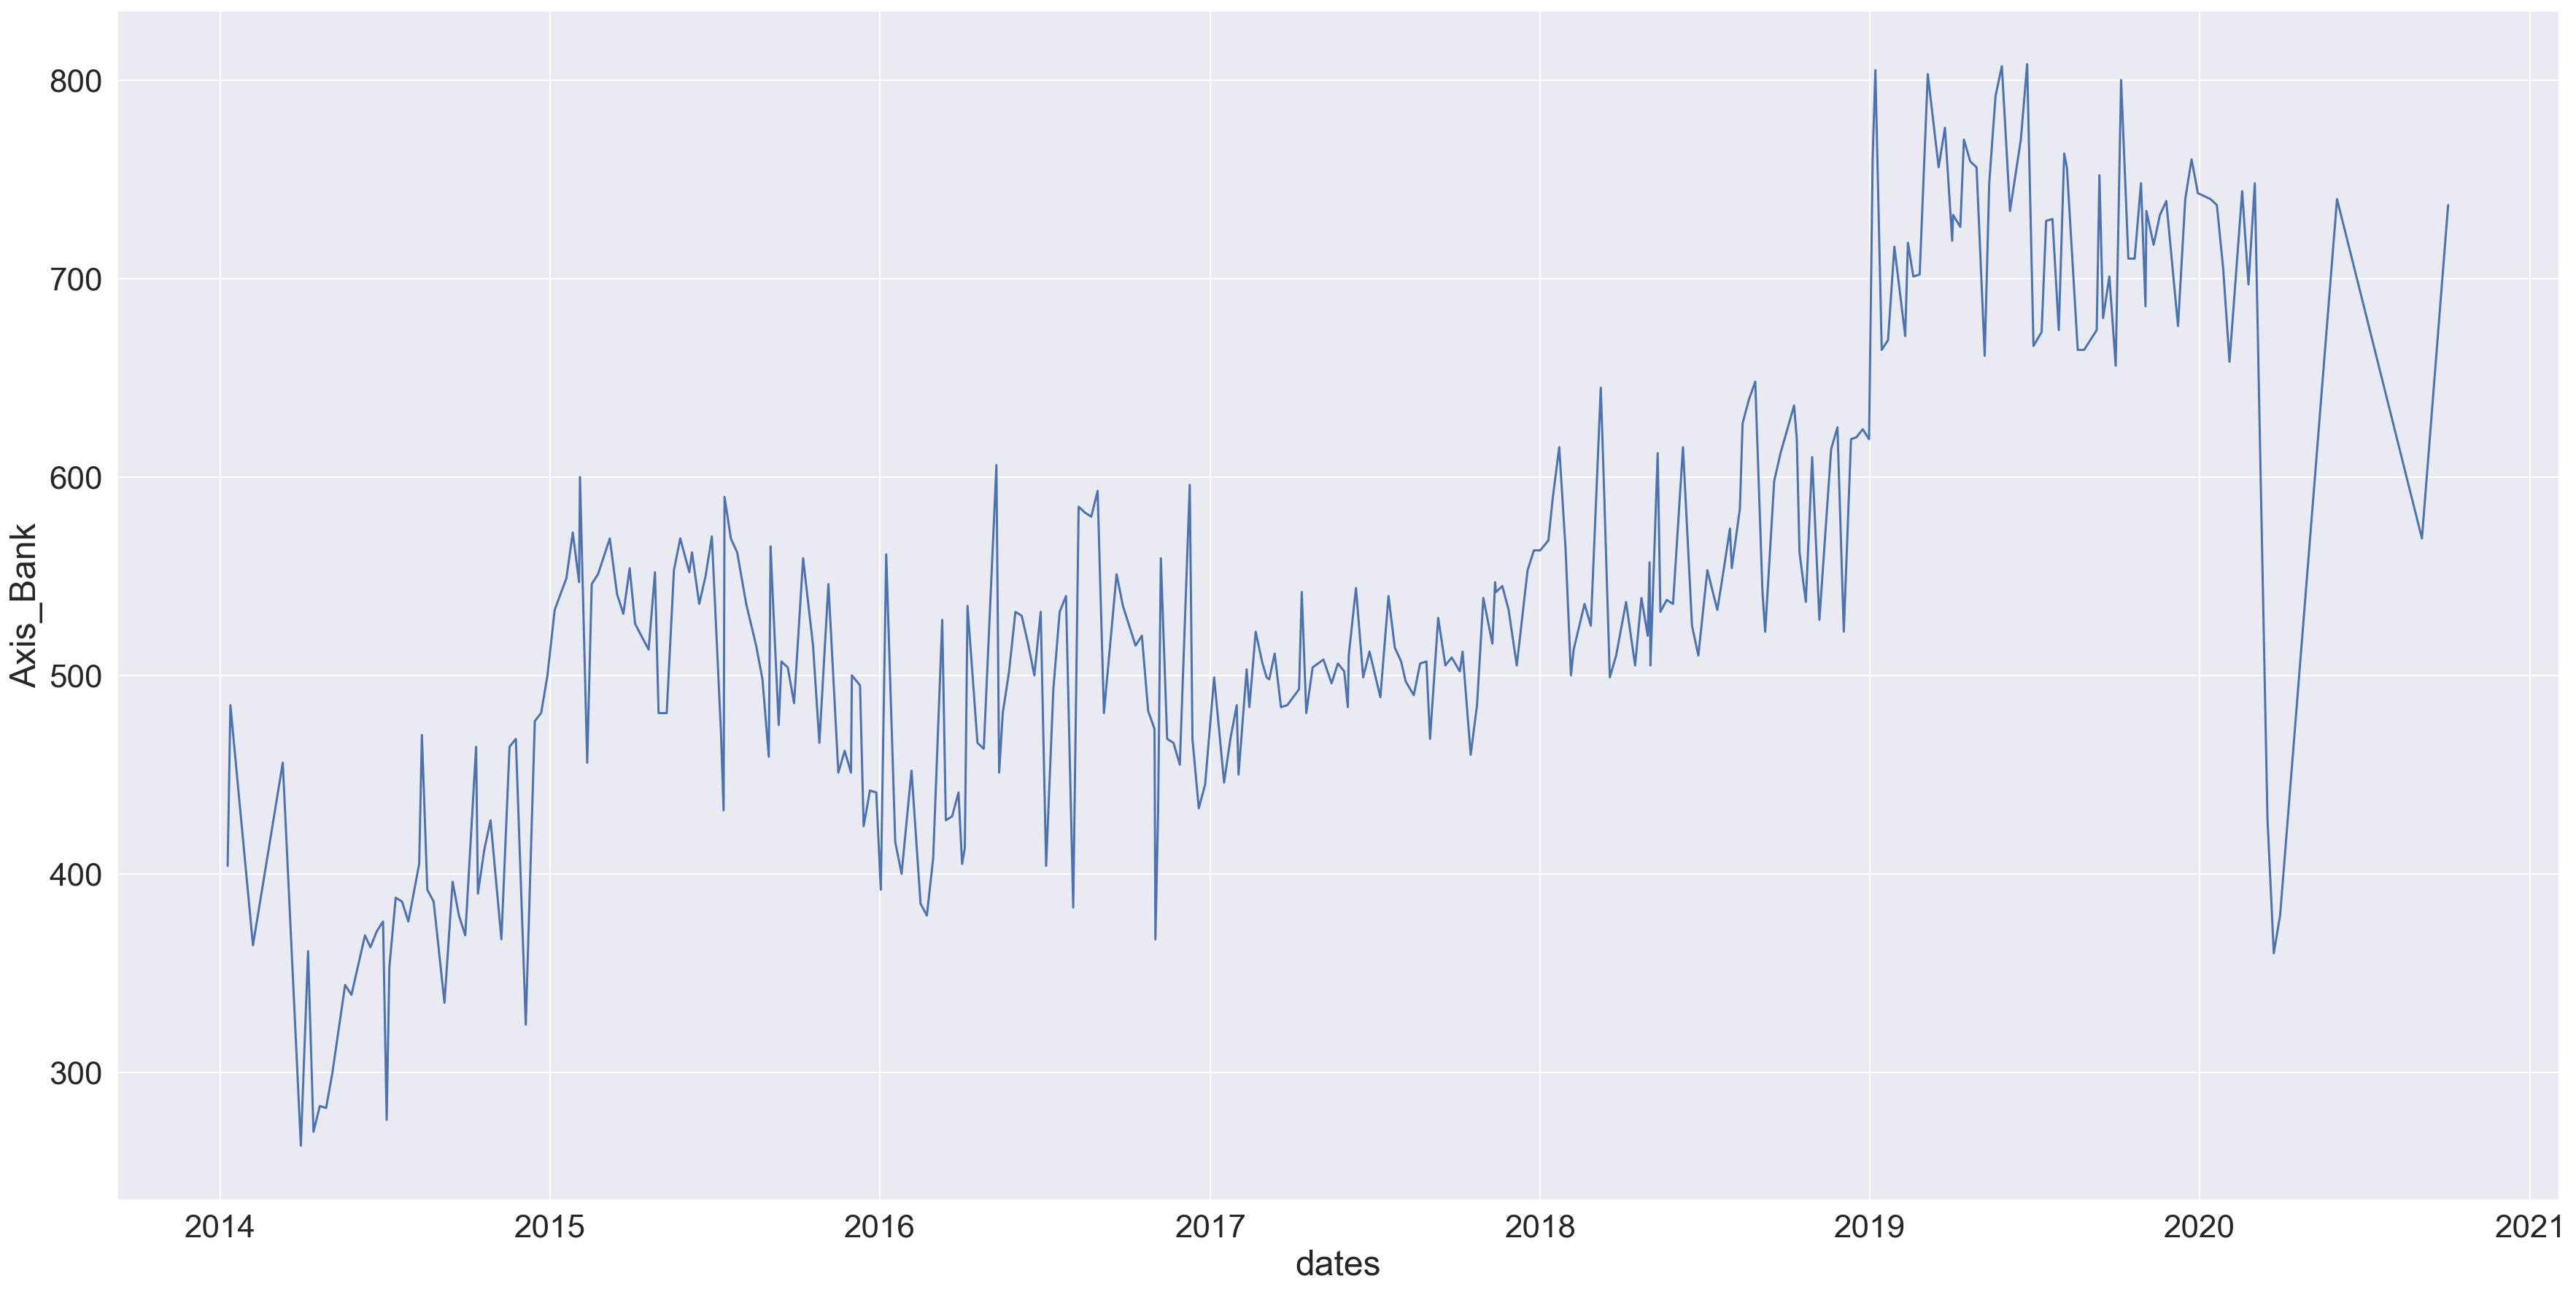

In [107]:
plt.figure(figsize=(30,15))
sns.lineplot(x = "dates", y = "Axis_Bank", data=df)
sns.set(font_scale=2)
plt.show()

<Figure size 2160x1080 with 0 Axes>

<AxesSubplot:xlabel='dates', ylabel='SAIL'>

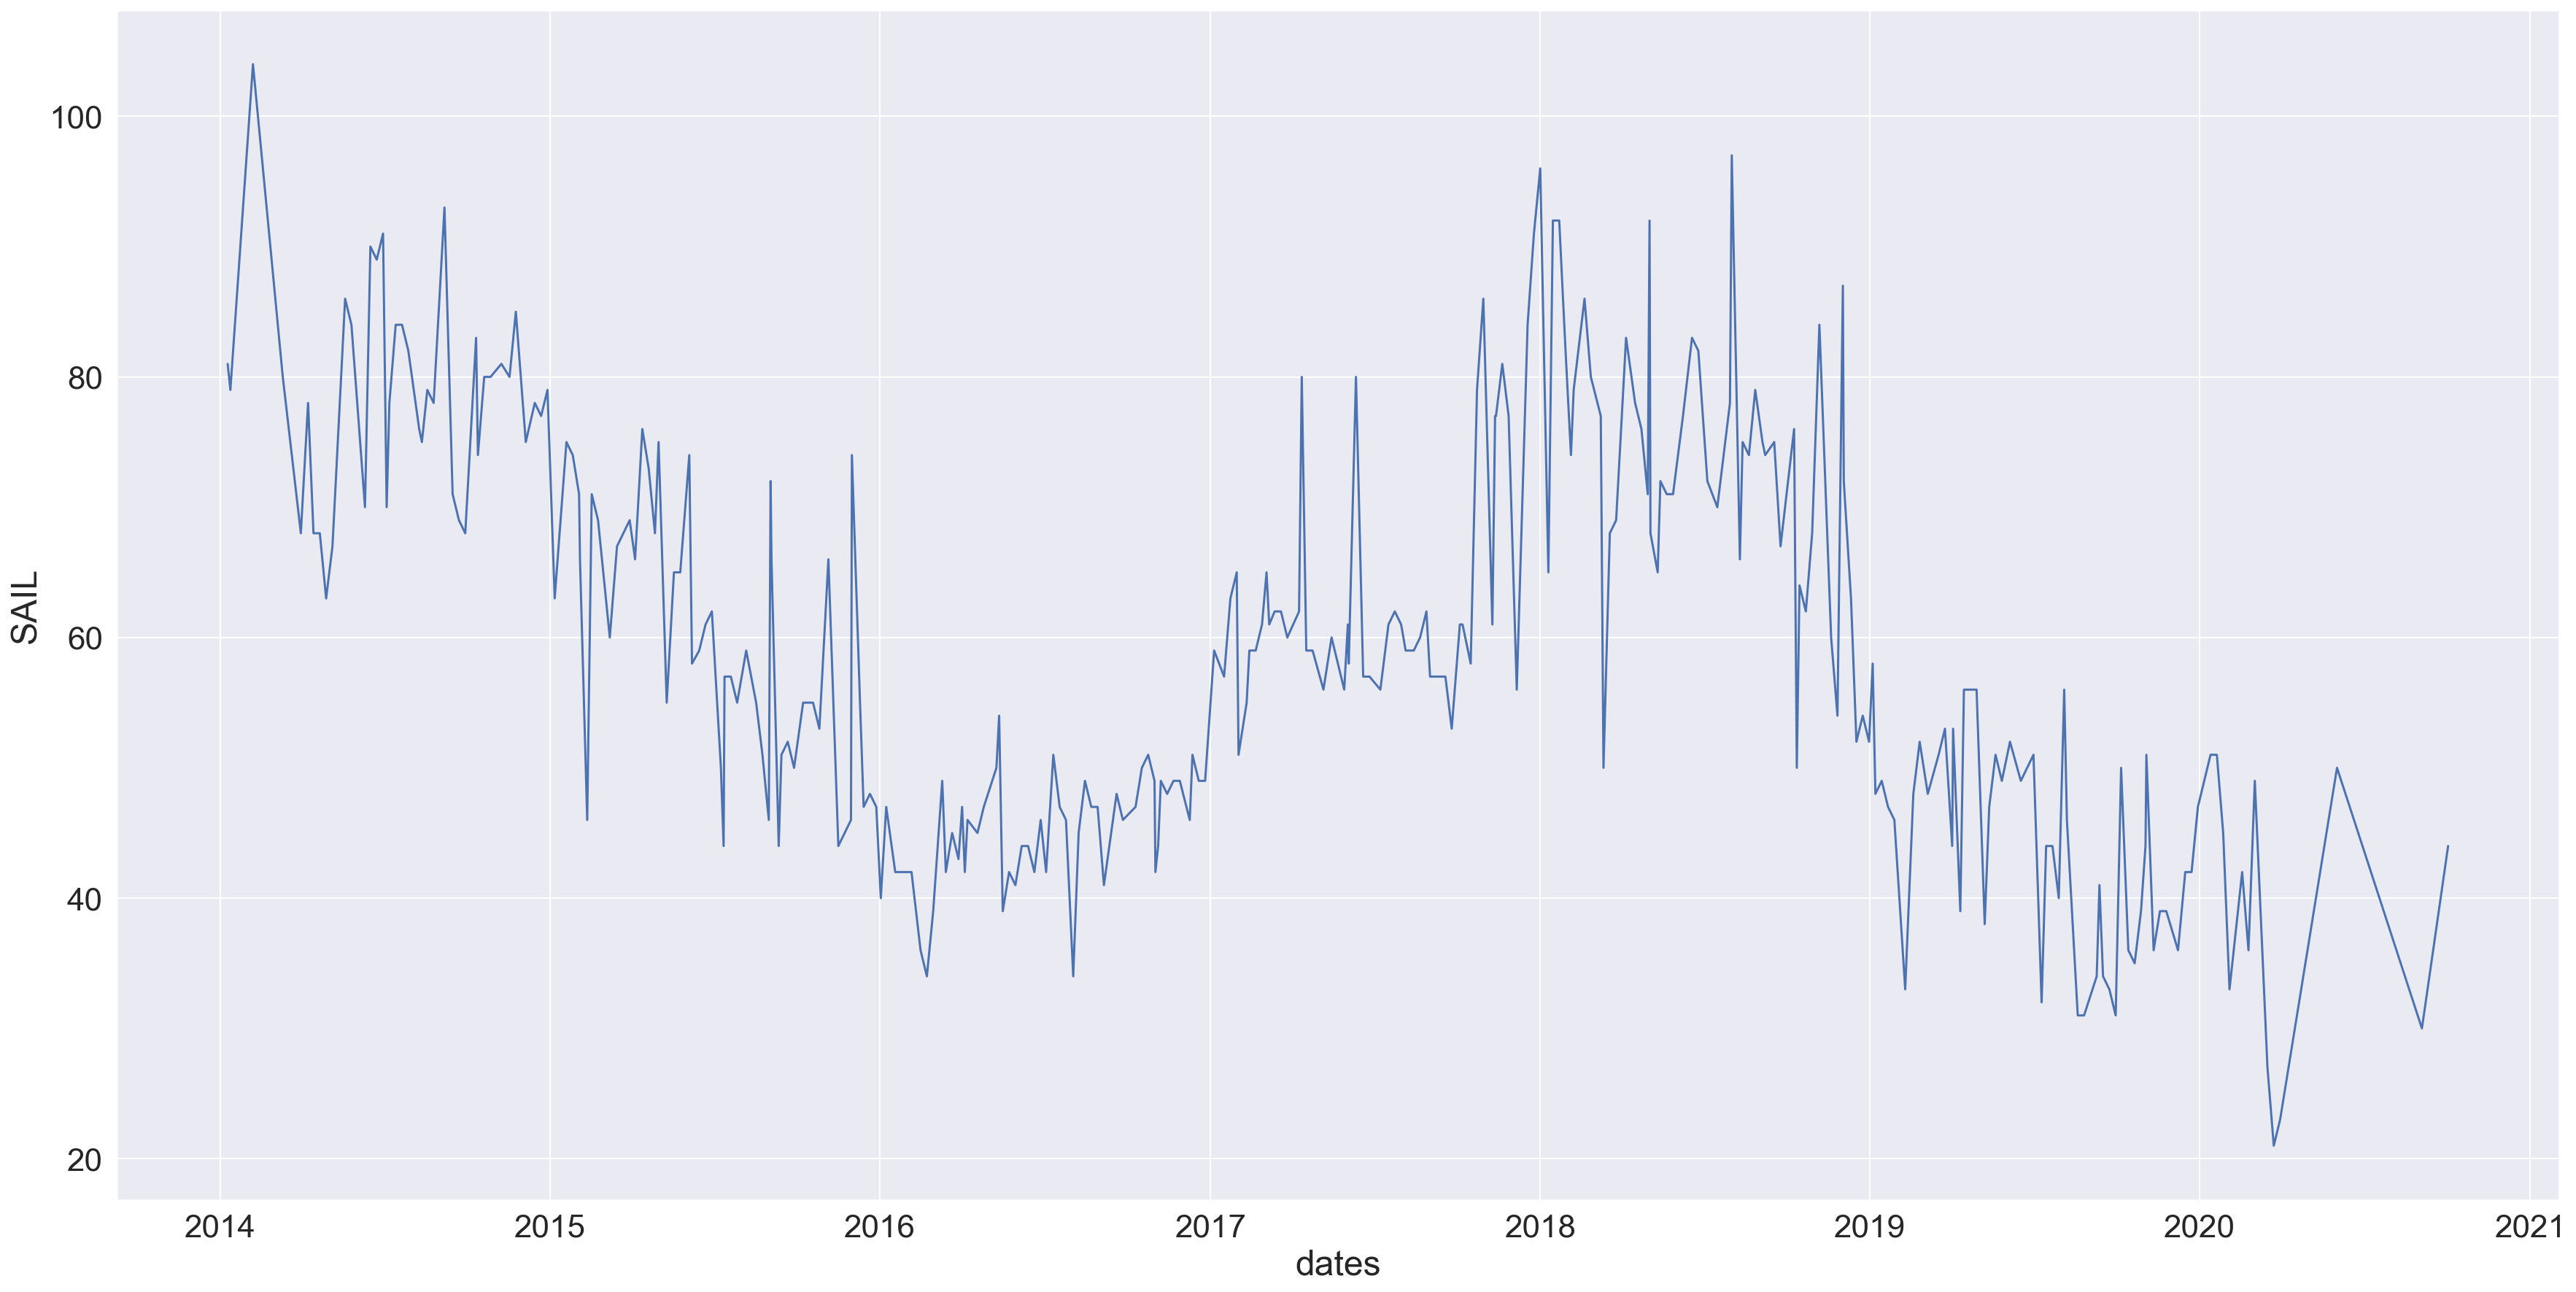

In [108]:
plt.figure(figsize=(30,15))
sns.lineplot(x = "dates", y = "SAIL", data=df)
sns.set(font_scale=2)
plt.show()

<Figure size 2160x1080 with 0 Axes>

<AxesSubplot:xlabel='dates', ylabel='Shree_Cement'>

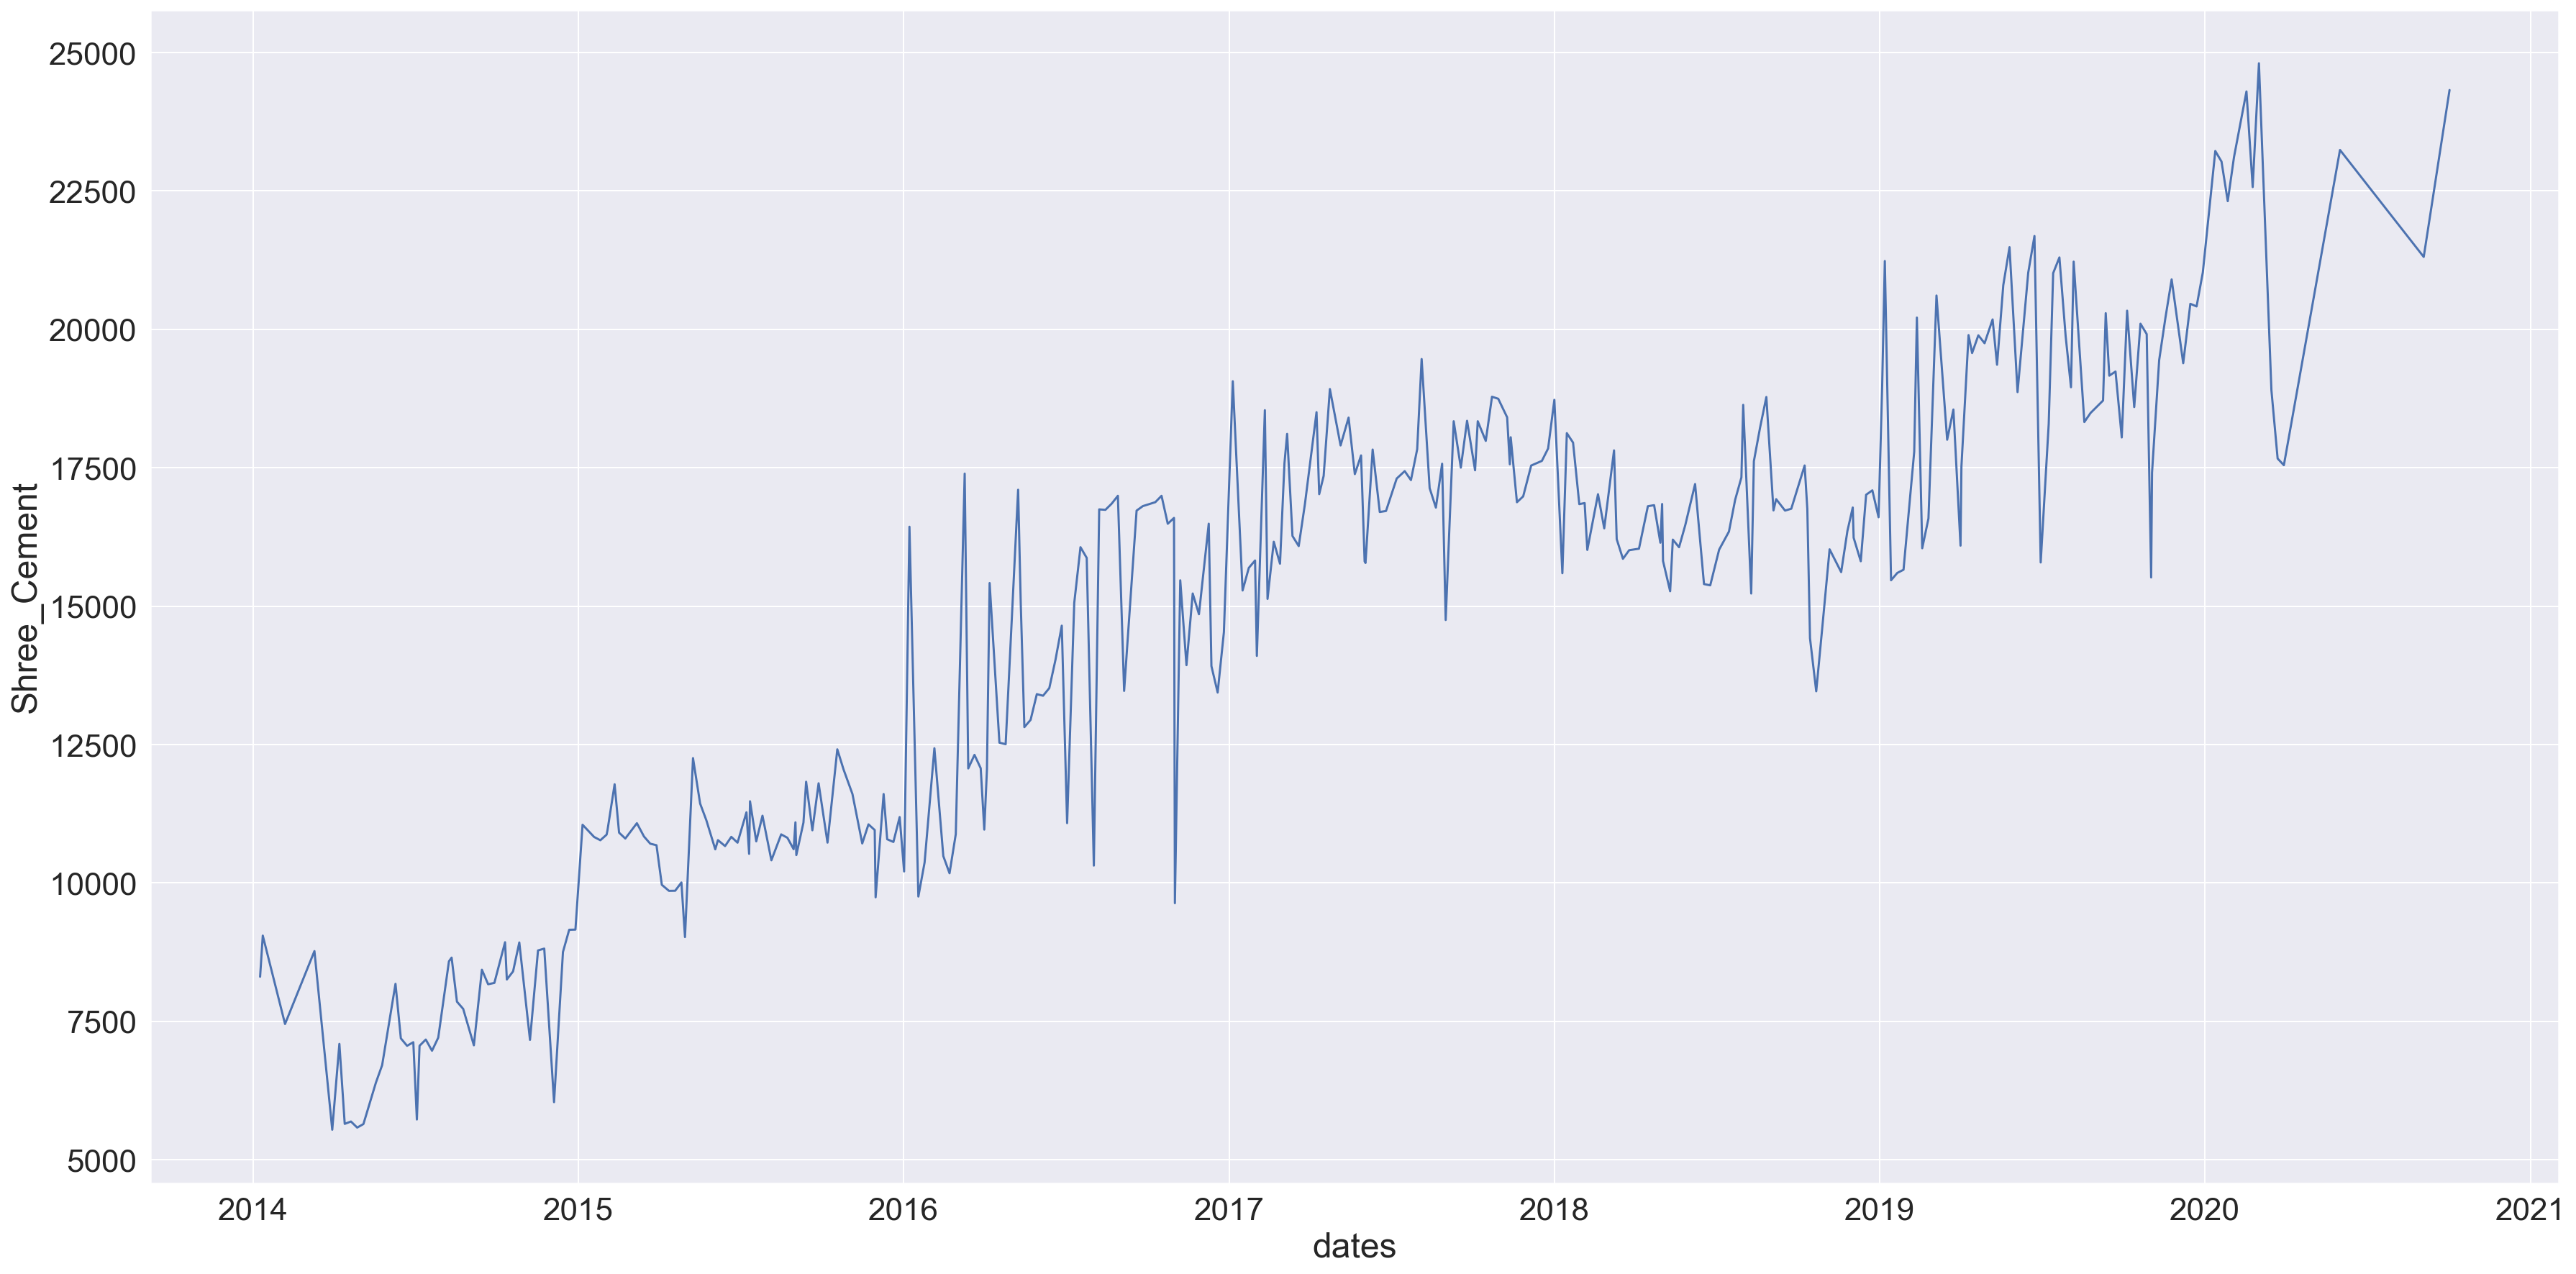

In [110]:
plt.figure(figsize=(30,15))
sns.lineplot(x = "dates", y = "Shree_Cement", data=df)
sns.set(font_scale=2)
plt.show()


<Figure size 2160x1080 with 0 Axes>

<AxesSubplot:xlabel='dates', ylabel='Sun_Pharma'>

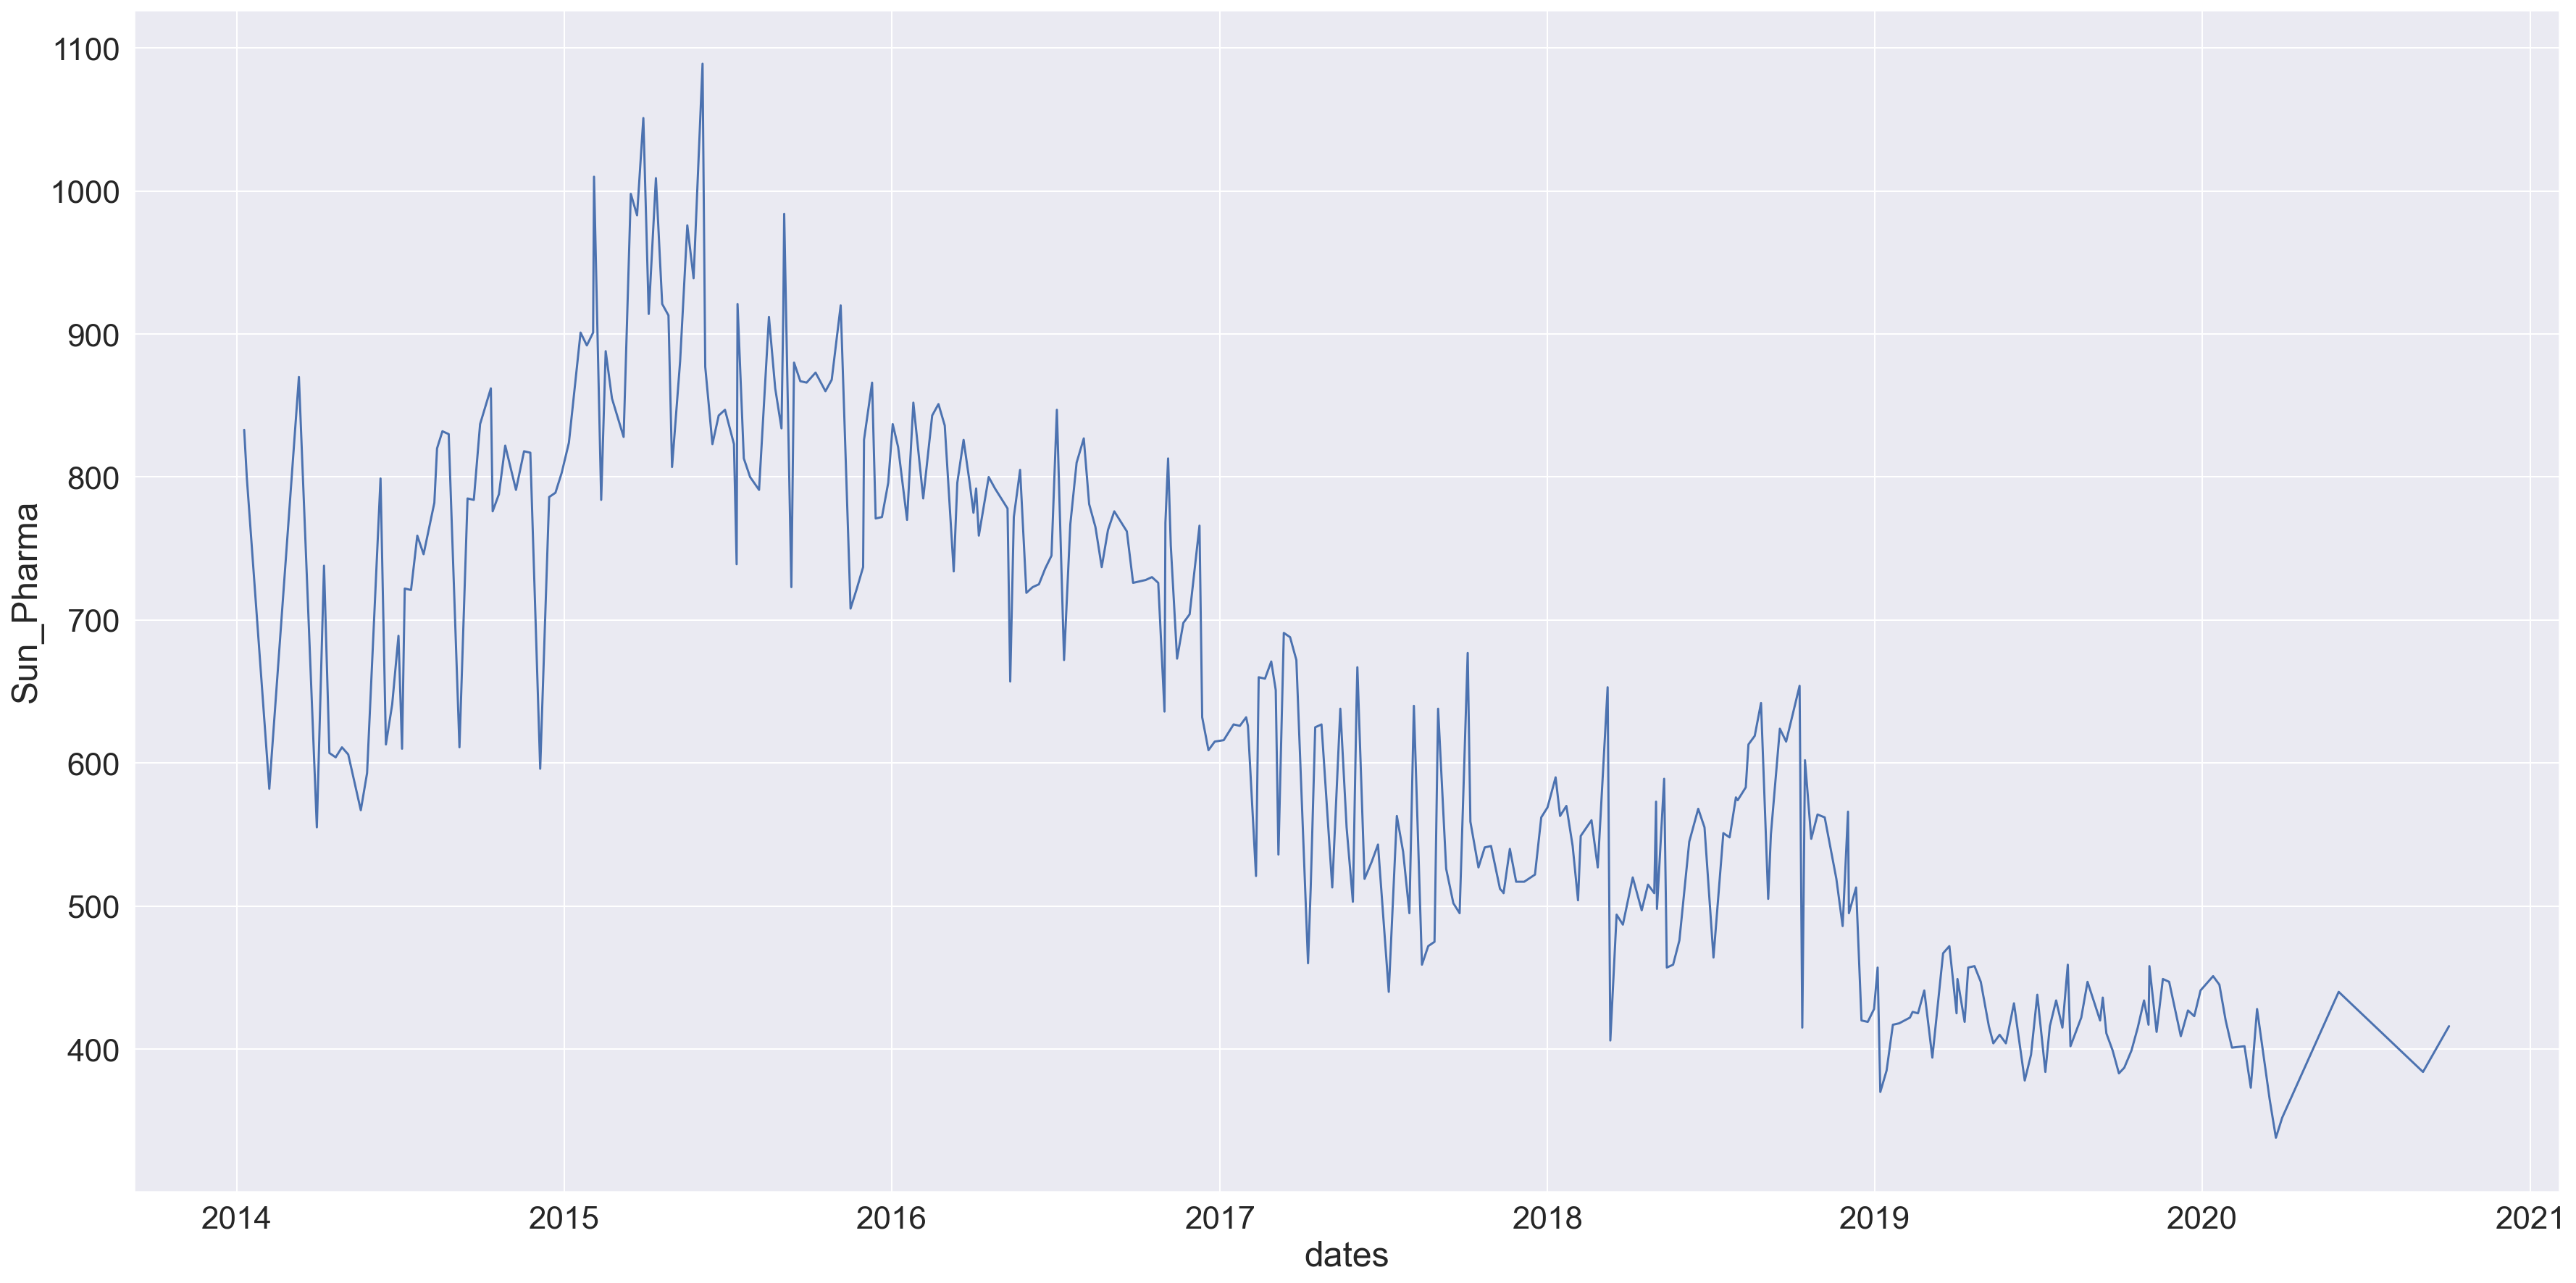

In [111]:
plt.figure(figsize=(30,15))
sns.lineplot(x = "dates", y = "Sun_Pharma", data=df)
sns.set(font_scale=2)
plt.show()


<Figure size 2160x1080 with 0 Axes>

<AxesSubplot:xlabel='dates', ylabel='Jindal_Steel'>

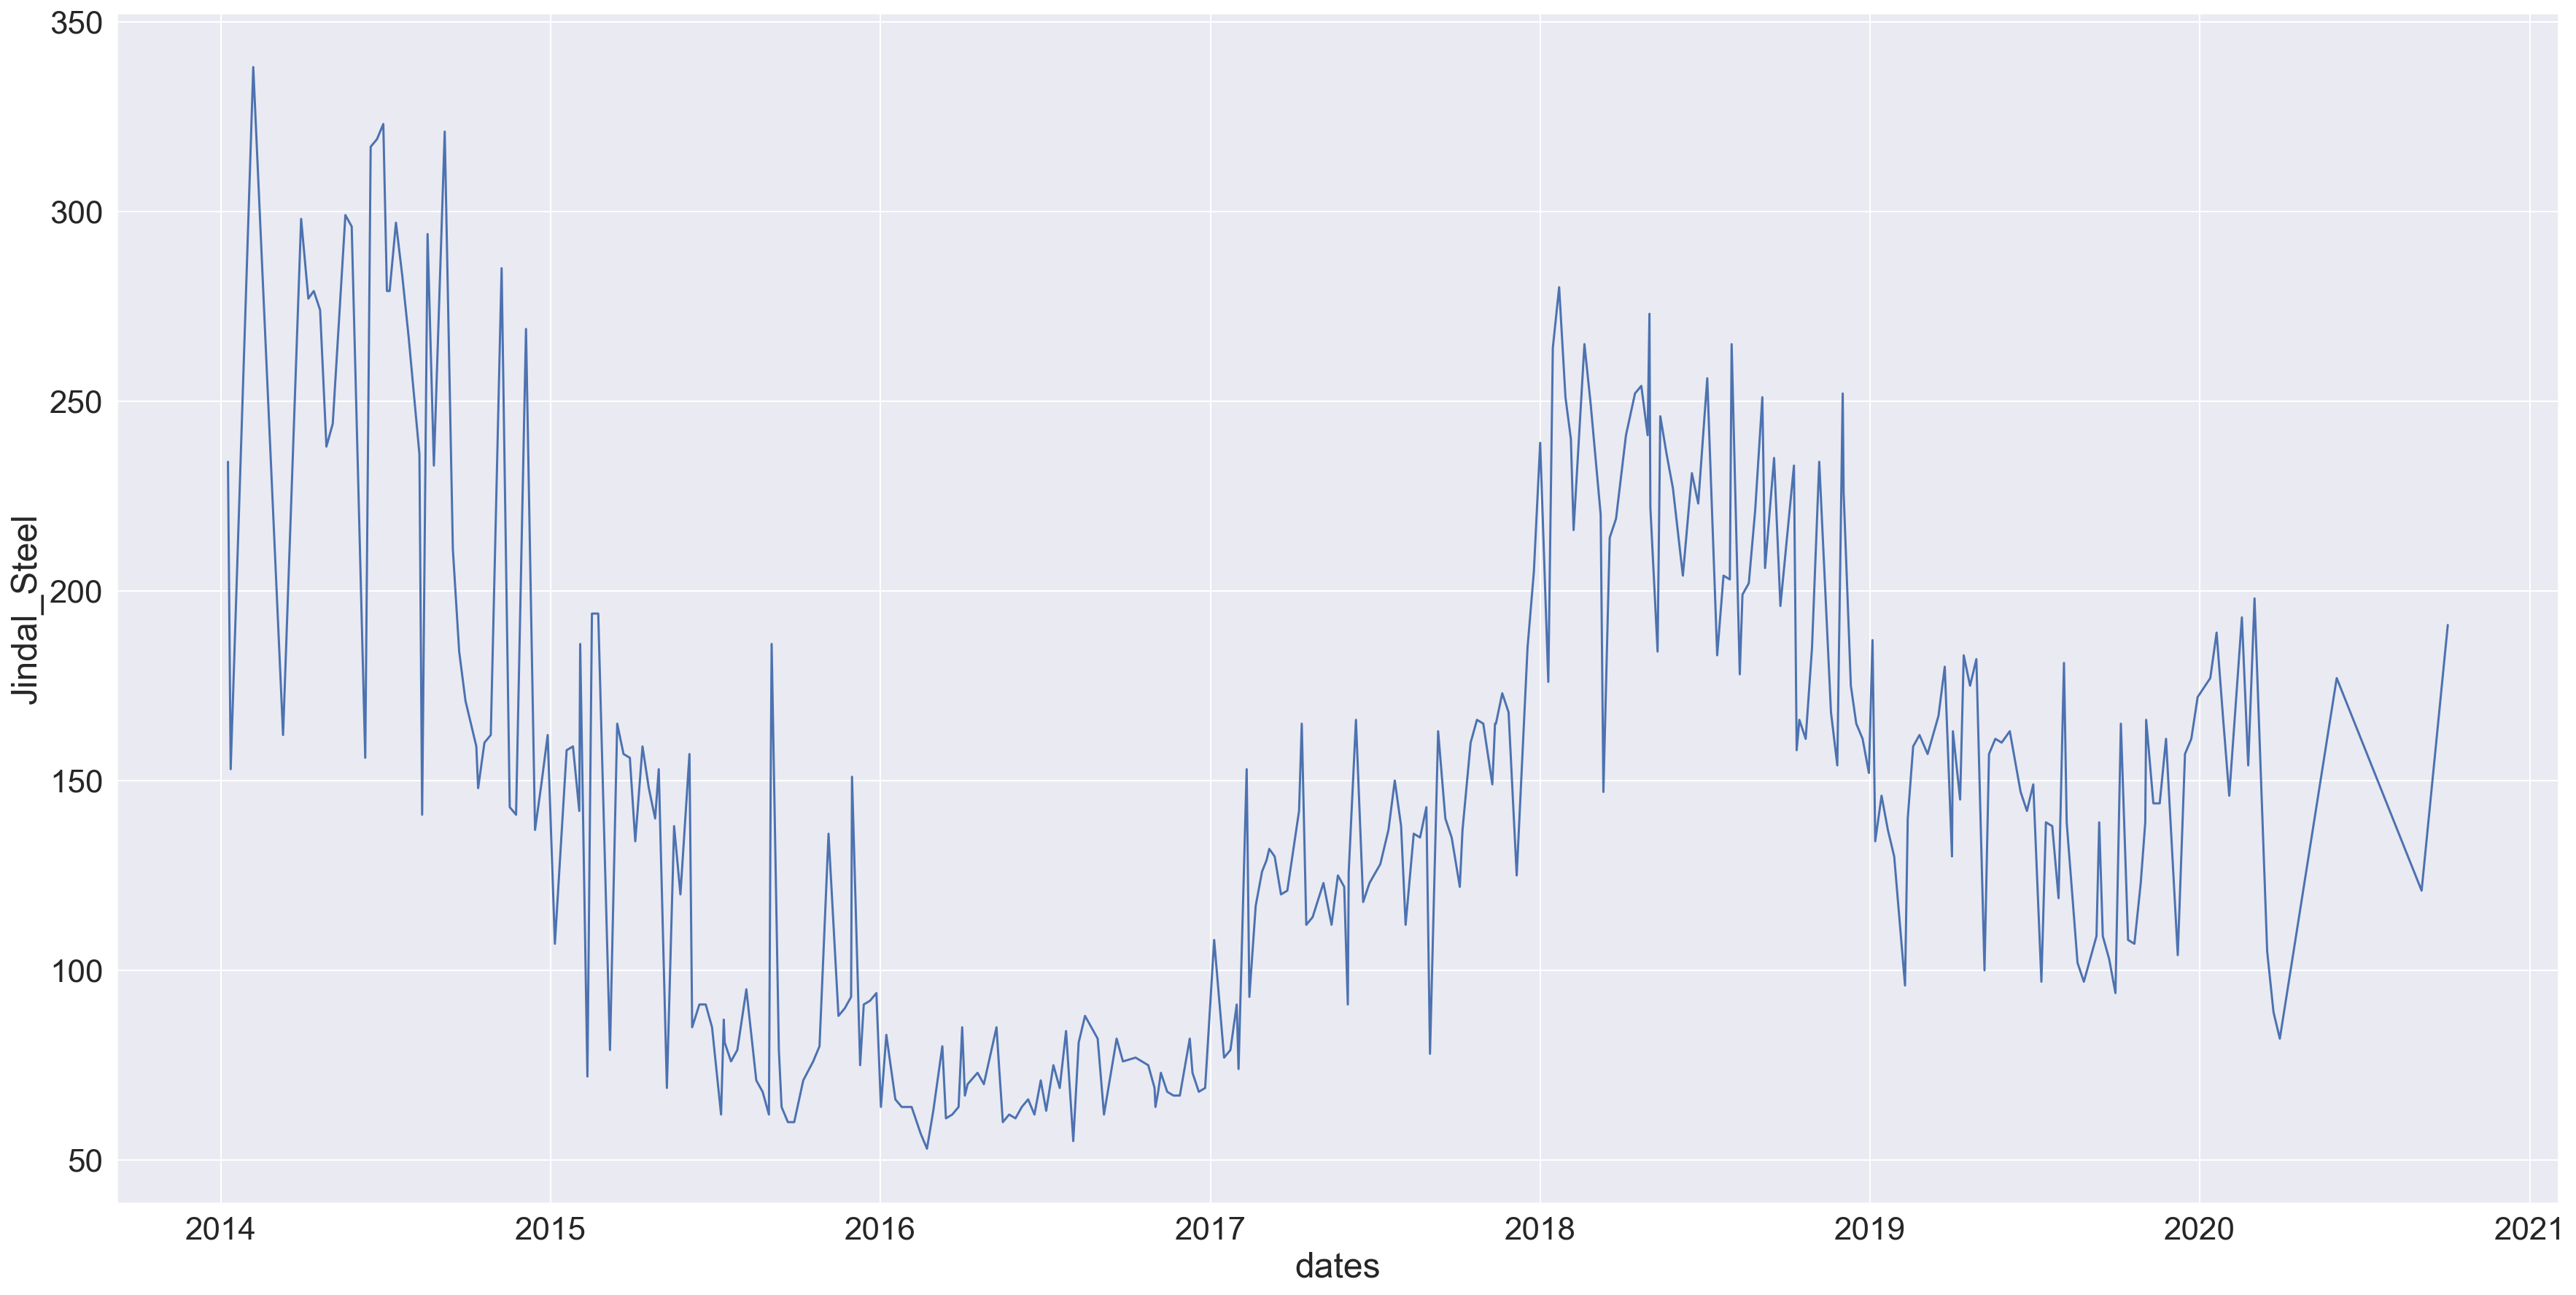

In [112]:
plt.figure(figsize=(30,15))
sns.lineplot(x = "dates", y = "Jindal_Steel", data=df)
sns.set(font_scale=2)
plt.show()


<Figure size 2160x1080 with 0 Axes>

<AxesSubplot:xlabel='dates', ylabel='Idea_Vodafone'>

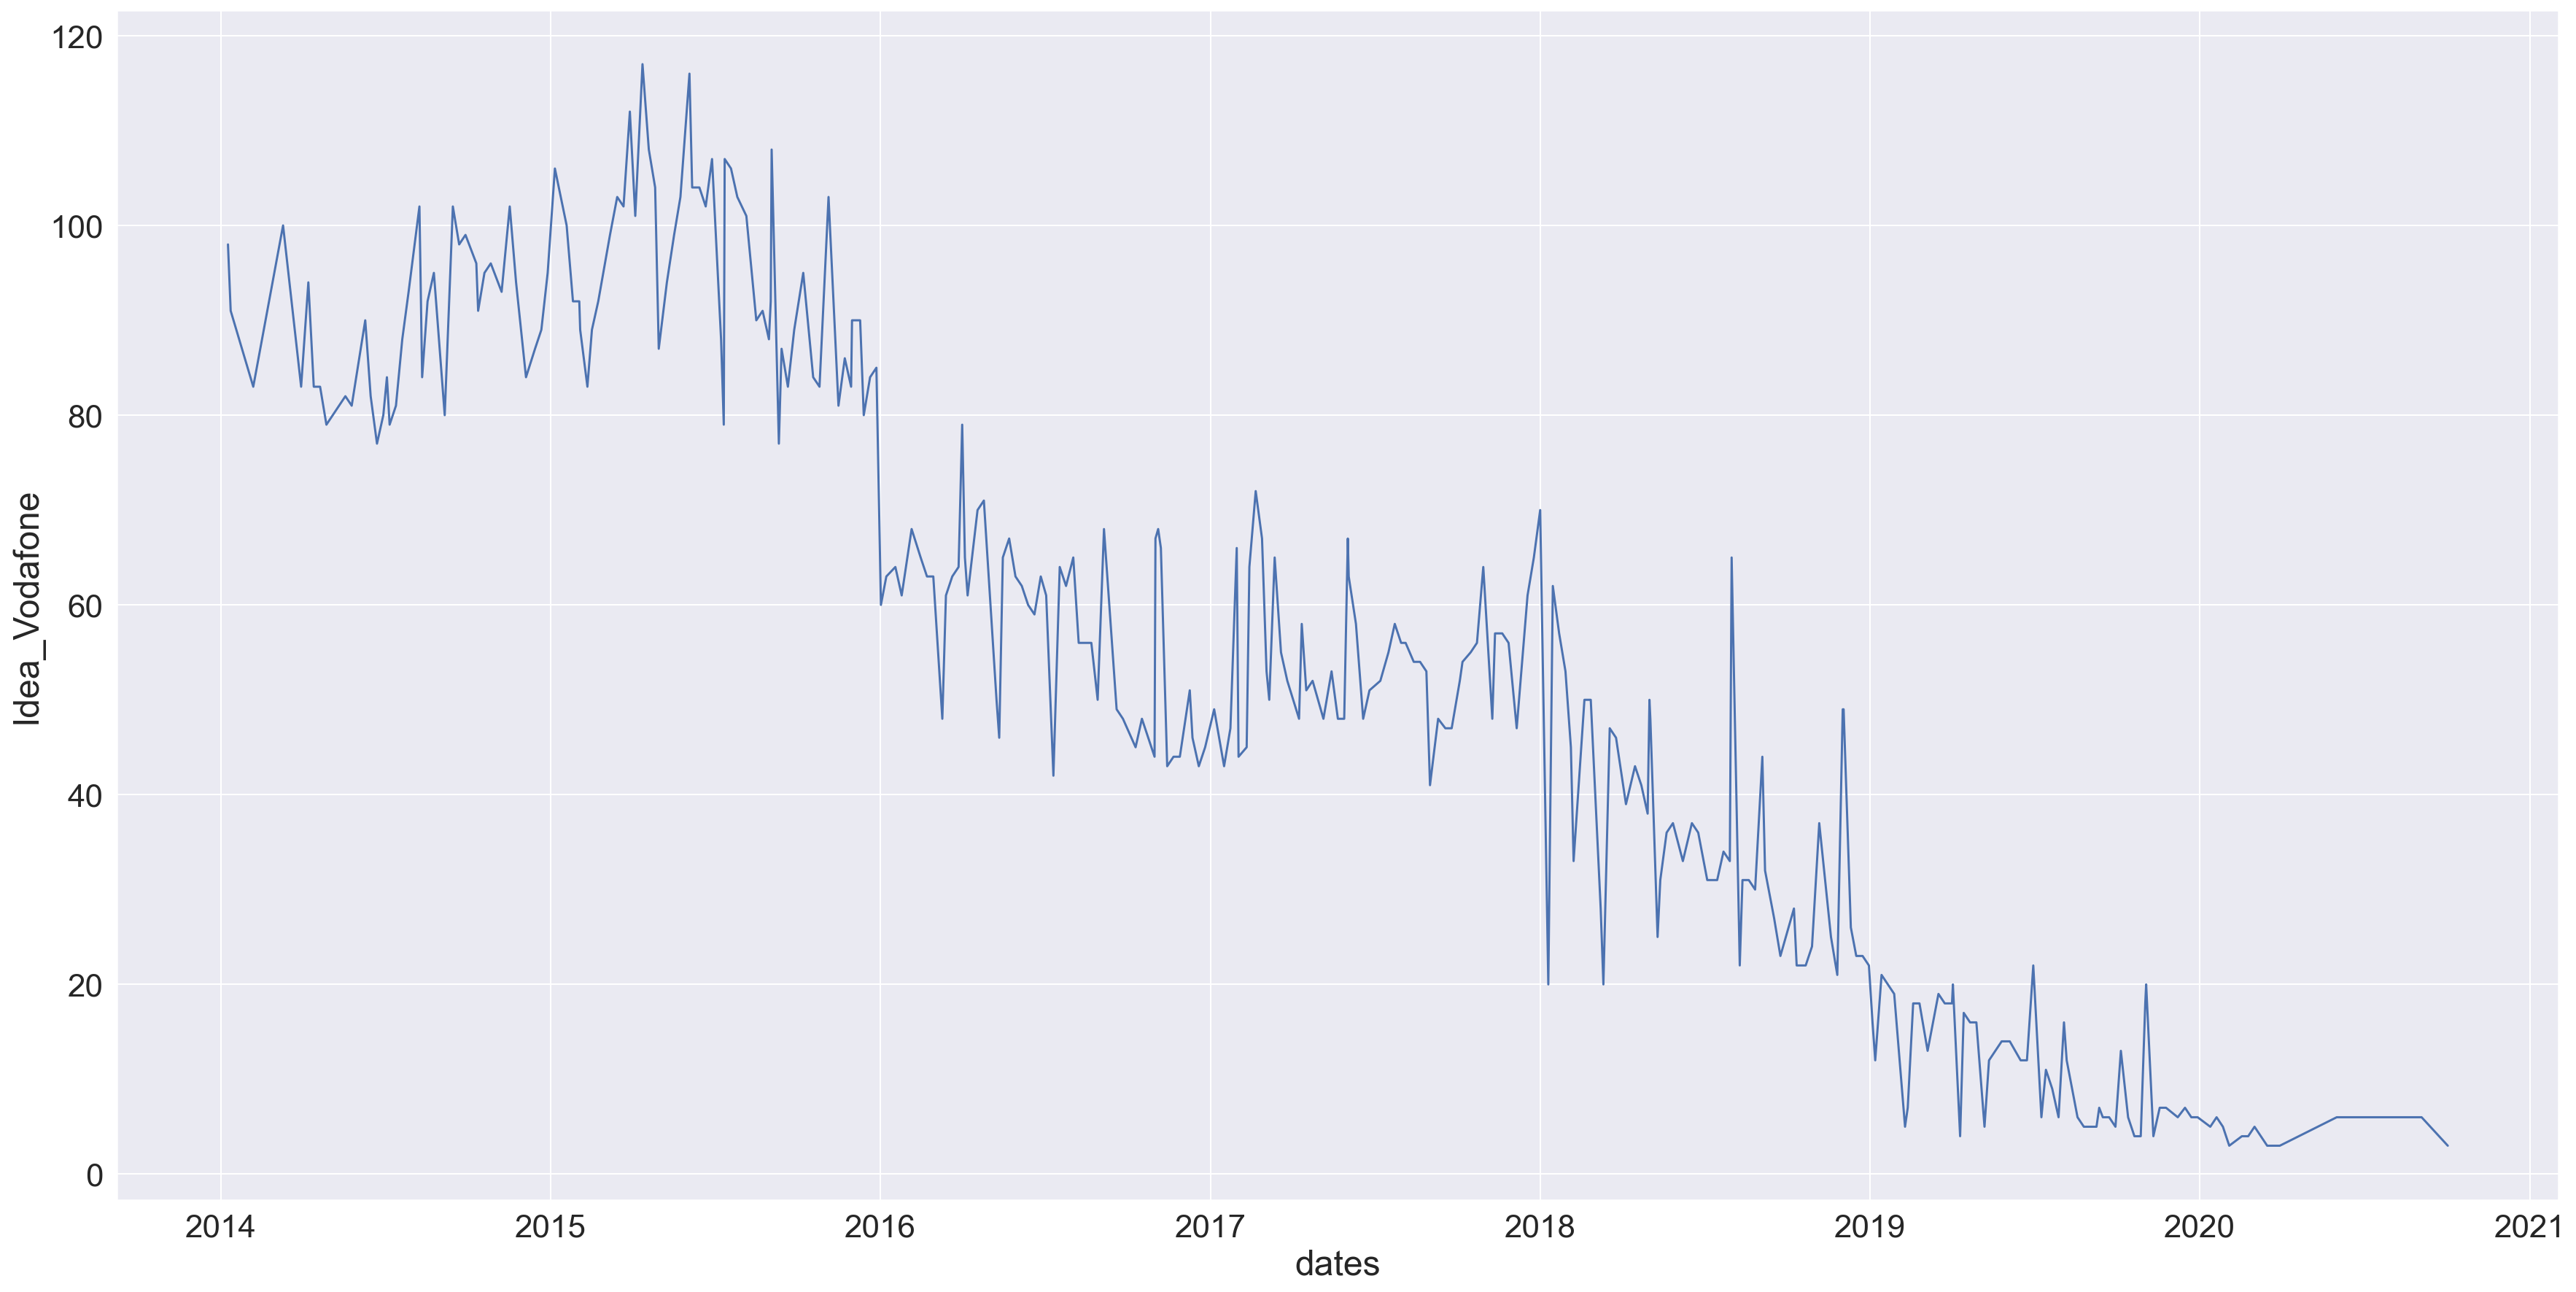

In [113]:
plt.figure(figsize=(30,15))
sns.lineplot(x = "dates", y = "Idea_Vodafone", data=df)
sns.set(font_scale=2)
plt.show()


<Figure size 2160x1080 with 0 Axes>

<AxesSubplot:xlabel='dates', ylabel='Jet_Airways'>

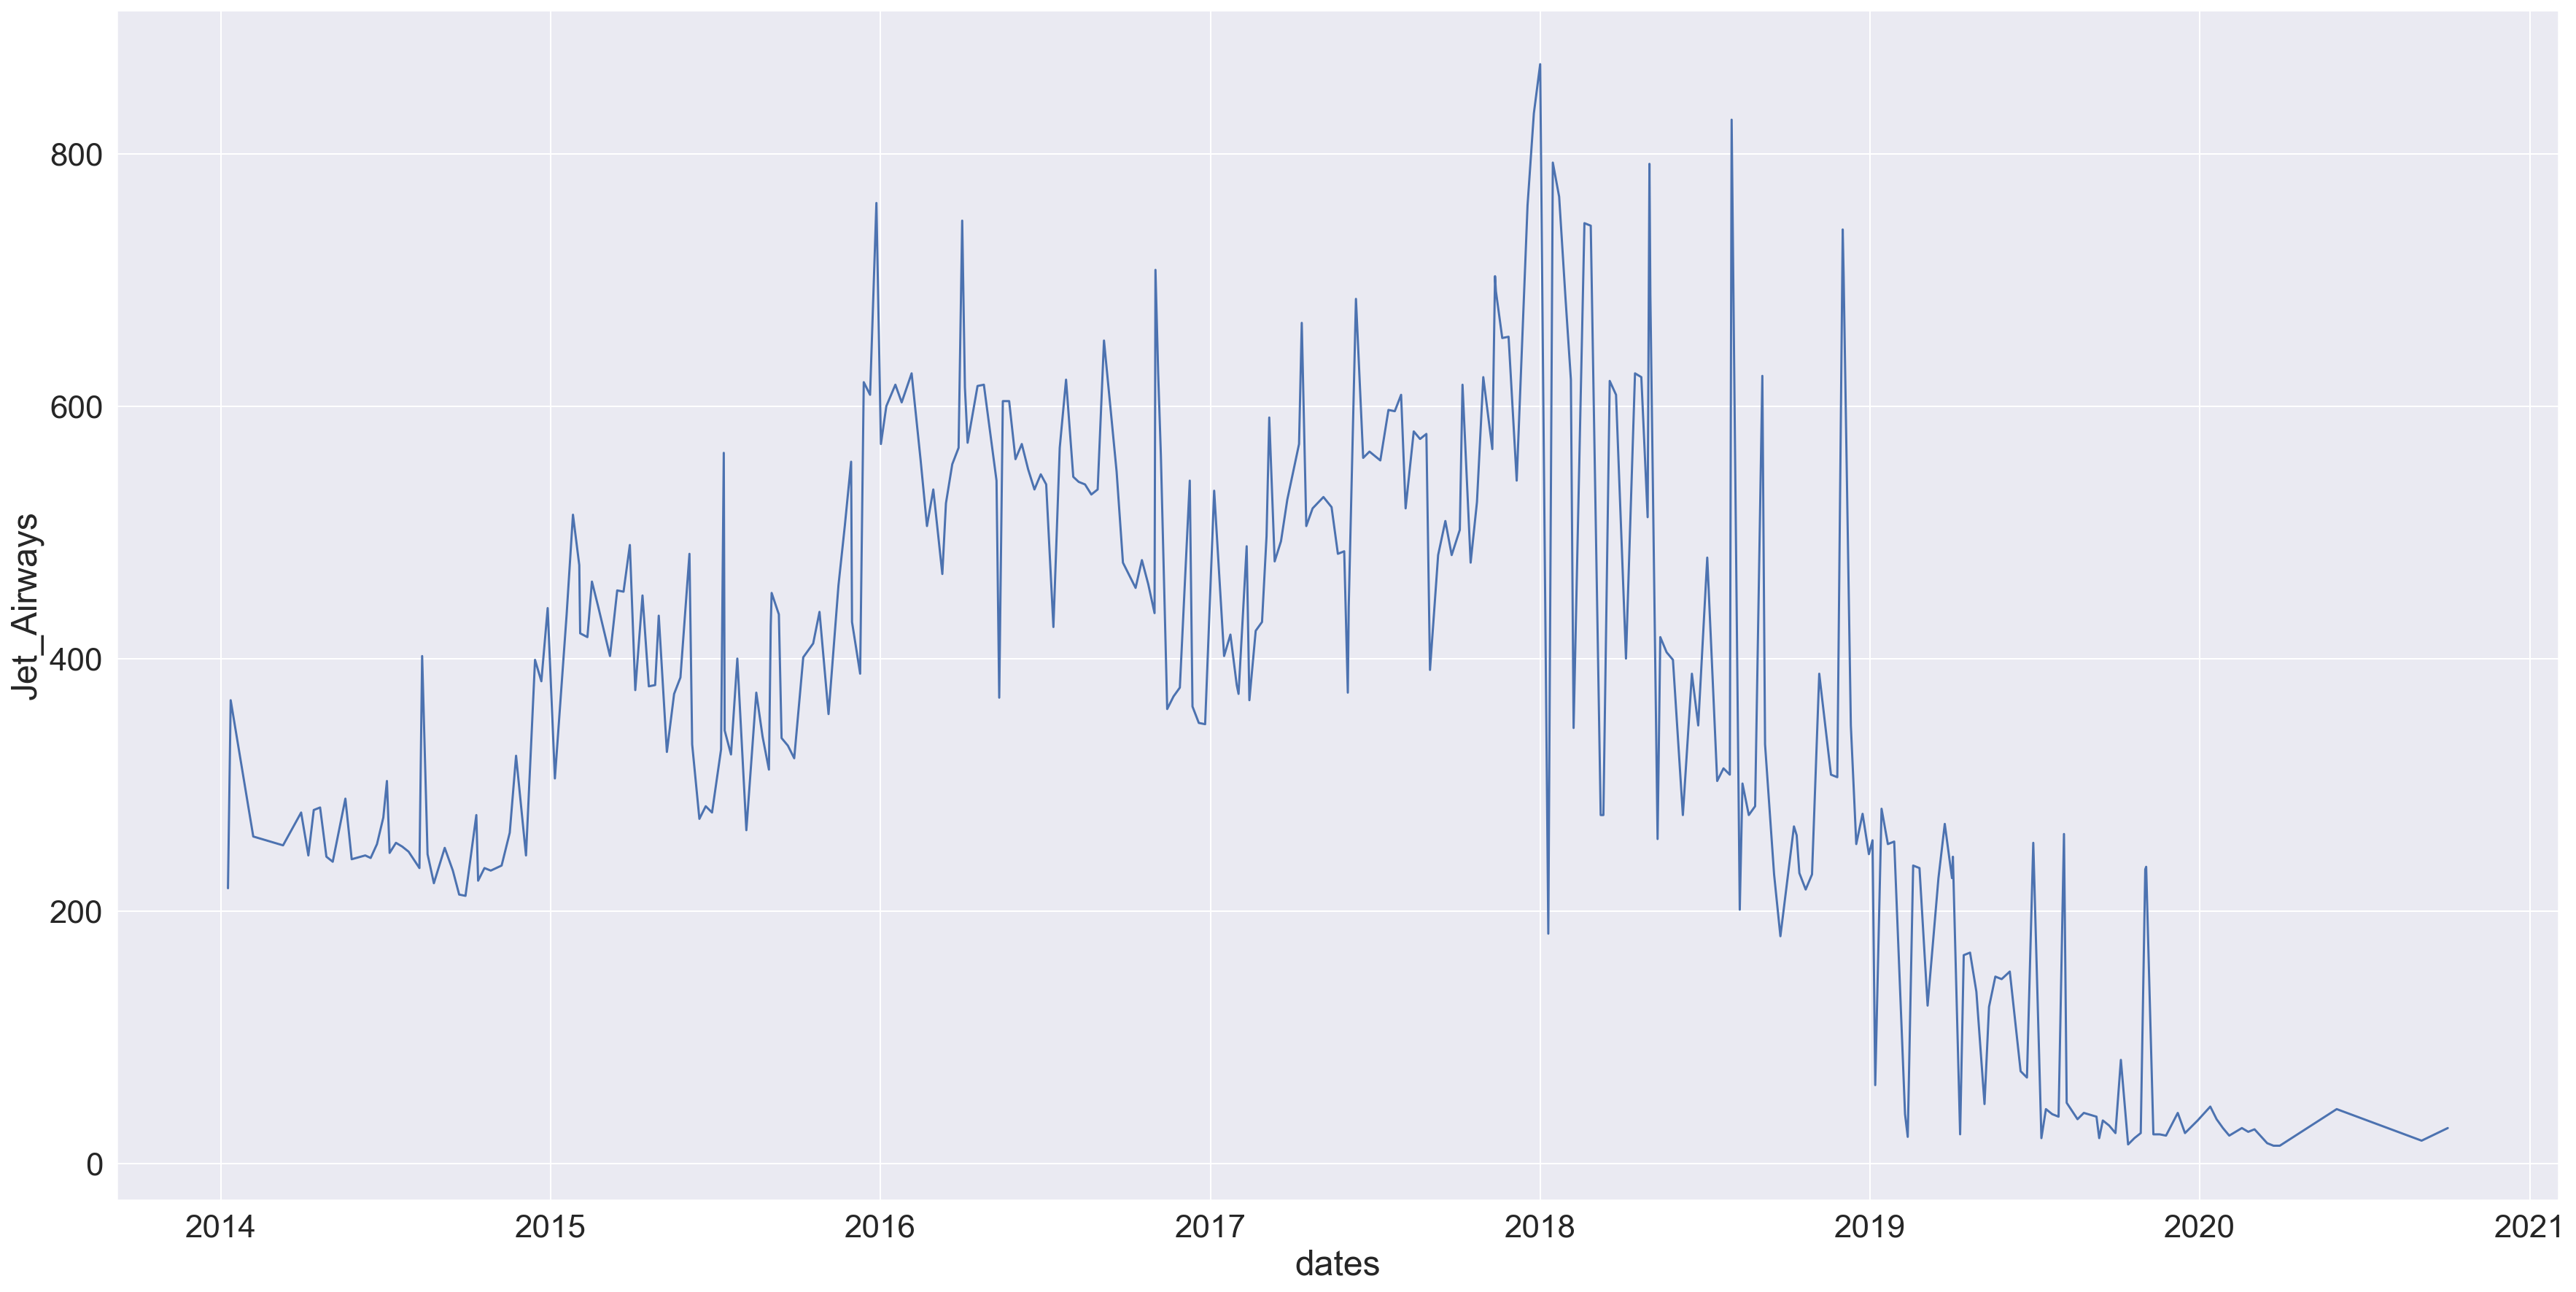

In [114]:
plt.figure(figsize=(30,15))
sns.lineplot(x = "dates", y = "Jet_Airways", data=df)
sns.set(font_scale=2)
plt.show()

In [115]:
#Q 2.2 Calculate Returns for all stocks with inference

In [116]:
#Steps for calculating returns from prices:
#Take logarithms
#Take differences

In [118]:
stock_returns = np.log(df.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)


In [119]:
stock_returns.shape

(314, 10)

In [121]:
stock_returns.head()


Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank      SAIL  Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways
0       NaN           NaN                  NaN        NaN       NaN           NaN         NaN           NaN            NaN          NaN
1 -0.026873     -0.014599             0.006572   0.048247  0.028988      0.032831    0.094491     -0.065882       0.011976     0.086112
2 -0.011742      0.000000            -0.008772  -0.021979 -0.028988     -0.013888   -0.004930      0.000000      -0.011976    -0.078943
3 -0.003945      0.000000             0.072218   0.047025  0.000000      0.007583   -0.004955     -0.018084       0.000000     0.007117
4  0.011788     -0.045120            -0.012371  -0.003540 -0.076373     -0.019515    0.011523     -0.140857      -0.049393    -0.148846

In [122]:
stock_returns

Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank      SAIL  Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways
0         NaN           NaN                  NaN        NaN       NaN           NaN         NaN           NaN            NaN          NaN
1   -0.026873     -0.014599             0.006572   0.048247  0.028988      0.032831    0.094491     -0.065882       0.011976     0.086112
2   -0.011742      0.000000            -0.008772  -0.021979 -0.028988     -0.013888   -0.004930      0.000000      -0.011976    -0.078943
3   -0.003945      0.000000             0.072218   0.047025  0.000000      0.007583   -0.004955     -0.018084       0.000000     0.007117
4    0.011788     -0.045120            -0.012371  -0.003540 -0.076373     -0.019515    0.011523     -0.140857      -0.049393    -0.148846
5   -0.031749     -0.015504             0.040656   0.061875  0.061558      0.011400   -0.008217      0.024898       0.012579    -0.016598
6    0.019961      0.060625             0.011881   0.076961  0.112795      0.067622   -0.016639      0.097543       0.048790     0.020705
7   -0.036221      0.199333             0.038615   0.059898  0.136859      0.056790   -0.049881      0.105732      -0.024098     0.169258
8   -0.041847     -0.012121             0.064183  -0.014642 -0.023530      0.048090    0.044835     -0.010084      -0.012270    -0.181630
9    0.135666      0.081917            -0.003559   0.071154  0.213574      0.105167   -0.018724      0.132686       0.024391     0.072031
10   0.057987      0.065241            -0.001784  -0.083023 -0.111791     -0.053039    0.048627     -0.051605      -0.036814    -0.035367
11   0.041385     -0.032088            -0.072187   0.080272 -0.032790      0.017670    0.003268     -0.012539       0.024693    -0.032523
12  -0.027399      0.021506             0.007648   0.021799 -0.011173     -0.018944    0.044665      0.006289      -0.062914     0.044452
13   0.006920      0.041673             0.064539   0.013387  0.022223      0.009166    0.072212      0.012461       0.038221     0.079739
14   0.023851     -0.031091            -0.055060  -0.063121 -0.154151     -0.009024    0.046784     -0.146441      -0.012579    -0.107797
15  -0.023851     -0.099530             0.016839   0.094537  0.074108      0.015740   -0.001386      0.062520       0.025001     0.032003
16   0.030563      0.022990             0.045339  -0.005168  0.000000     -0.028569    0.051363     -0.048285       0.082888    -0.011881
17  -0.003350     -0.022990            -0.030605  -0.026248 -0.024098      0.033438   -0.017276     -0.058198       0.055263    -0.016065
18   0.042699     -0.084899             0.046437  -0.040711 -0.050010     -0.015803   -0.010782      0.036769       0.010695    -0.012220
19   0.034759     -0.051960             0.072361   0.016484  0.037740      0.010098    0.069354      0.028472      -0.010695    -0.033336
20  -0.003110      0.101352             0.050644   0.065900 -0.025001      0.091930    0.050534      0.031091      -0.010811     0.037426
21   0.000000      0.069796             0.010745  -0.015424 -0.012739     -0.016686   -0.002407     -0.232541       0.032088    -0.098581
22   0.036701      0.033152             0.001526   0.045578  0.037740      0.072387    0.003608      0.004283       0.031091    -0.018182
23  -0.015129     -0.010929            -0.013814   0.002472 -0.063716      0.033038   -0.063179      0.008511       0.040005     0.070826
24   0.006079     -0.011050            -0.010878  -0.022473 -0.068053     -0.017864    0.003829     -0.111974       0.000000    -0.008584
25  -0.006079     -0.045462             0.013965  -0.043878 -0.028573     -0.031561   -0.001275     -0.136922      -0.040005    -0.085445
26   0.044717      0.022990            -0.003086  -0.026740 -0.014599      0.002933    0.065415     -0.073272       0.010152    -0.004706
27   0.011594      0.000000            -0.052351   0.000000  0.028988     -0.001954   -0.046463     -0.091808      -0.095310     0.140582
28  

In [123]:
#Stock Means: Average returns that the stock is making on a week to week basis
#Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

In [124]:
#mean
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree_Cement           0.003681
Infosys                0.002794
Axis_Bank              0.001167
Indian_Hotel           0.000266
Sun_Pharma            -0.001455
Mahindra_&_Mahindra   -0.001506
SAIL                  -0.003463
Jindal_Steel          -0.004123
Jet_Airways           -0.009548
Idea_Vodafone         -0.010608
dtype: float64

In [126]:
#standard deviation
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea_Vodafone          0.104315
Jet_Airways            0.097972
Jindal_Steel           0.075108
SAIL                   0.062188
Indian_Hotel           0.047131
Axis_Bank              0.045828
Sun_Pharma             0.045033
Mahindra_&_Mahindra    0.040169
Shree_Cement           0.039917
Infosys                0.035070
dtype: float64

In [128]:
#Let us plot & see  stock prices

<AxesSubplot:>

Text(0.5, 0, 'Stock Prices')

Text(0, 0.5, 'Cumulative Returns Last 6yrs')

Text(0.5, 1.0, 'Stock Price-Cumulative Return ')

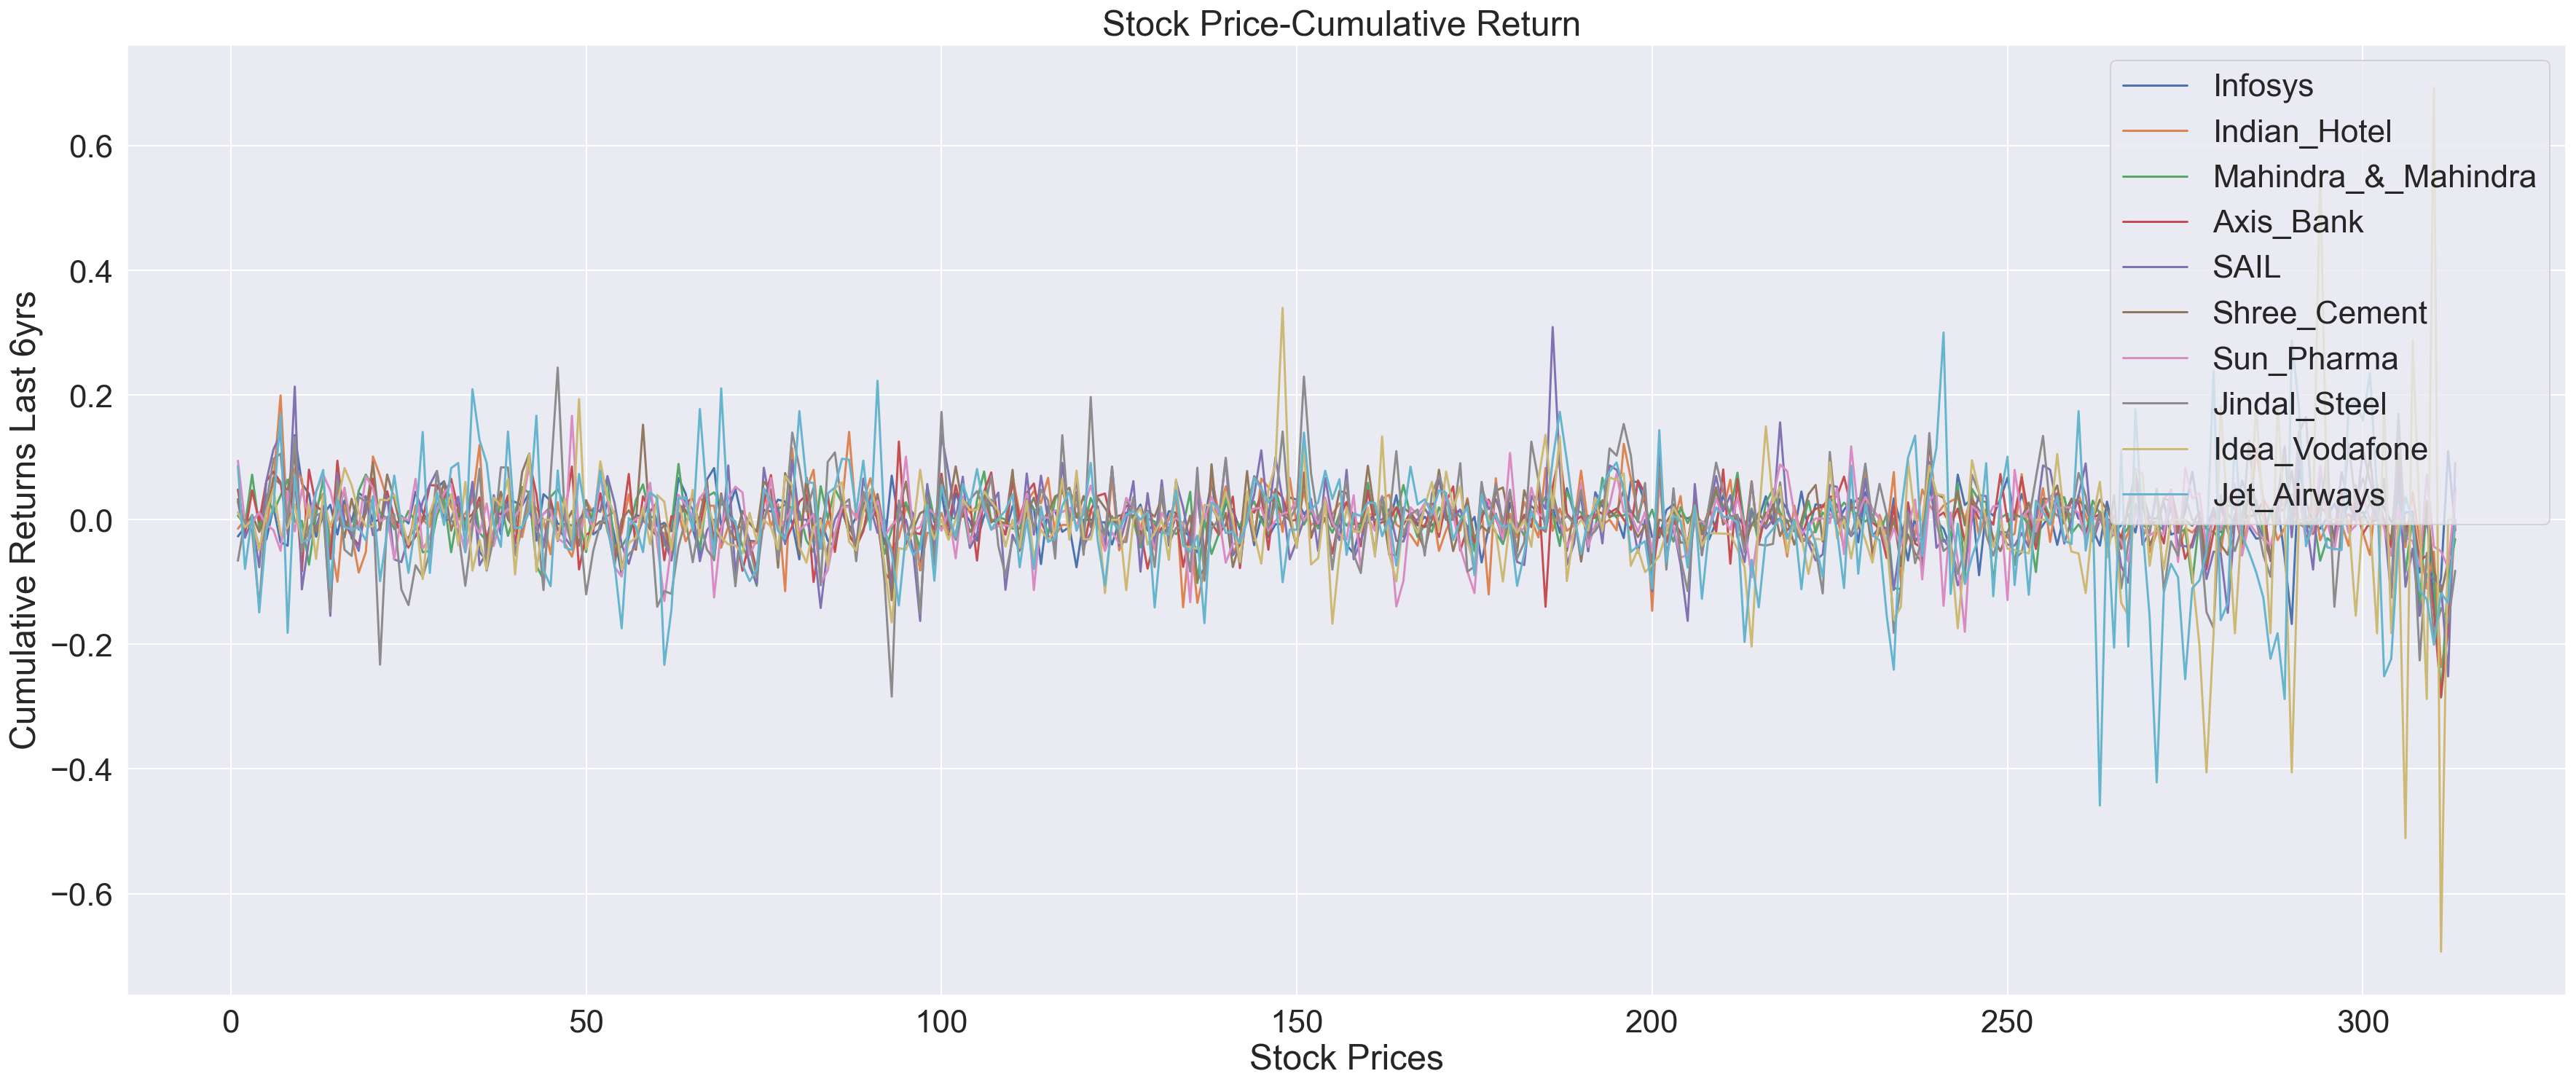

In [132]:
stock_returns.plot(figsize=(30,12)) 
plt.xlabel("Stock Prices") 
plt.ylabel("Cumulative Returns Last 6yrs") 
plt.title("Stock Price-Cumulative Return ")
plt.show()

Text(0.5, 0, 'stock_means')

Text(0, 0.5, 'stock_sd')

Text(0.5, 1.0, 'stock_means vs stock_sd')

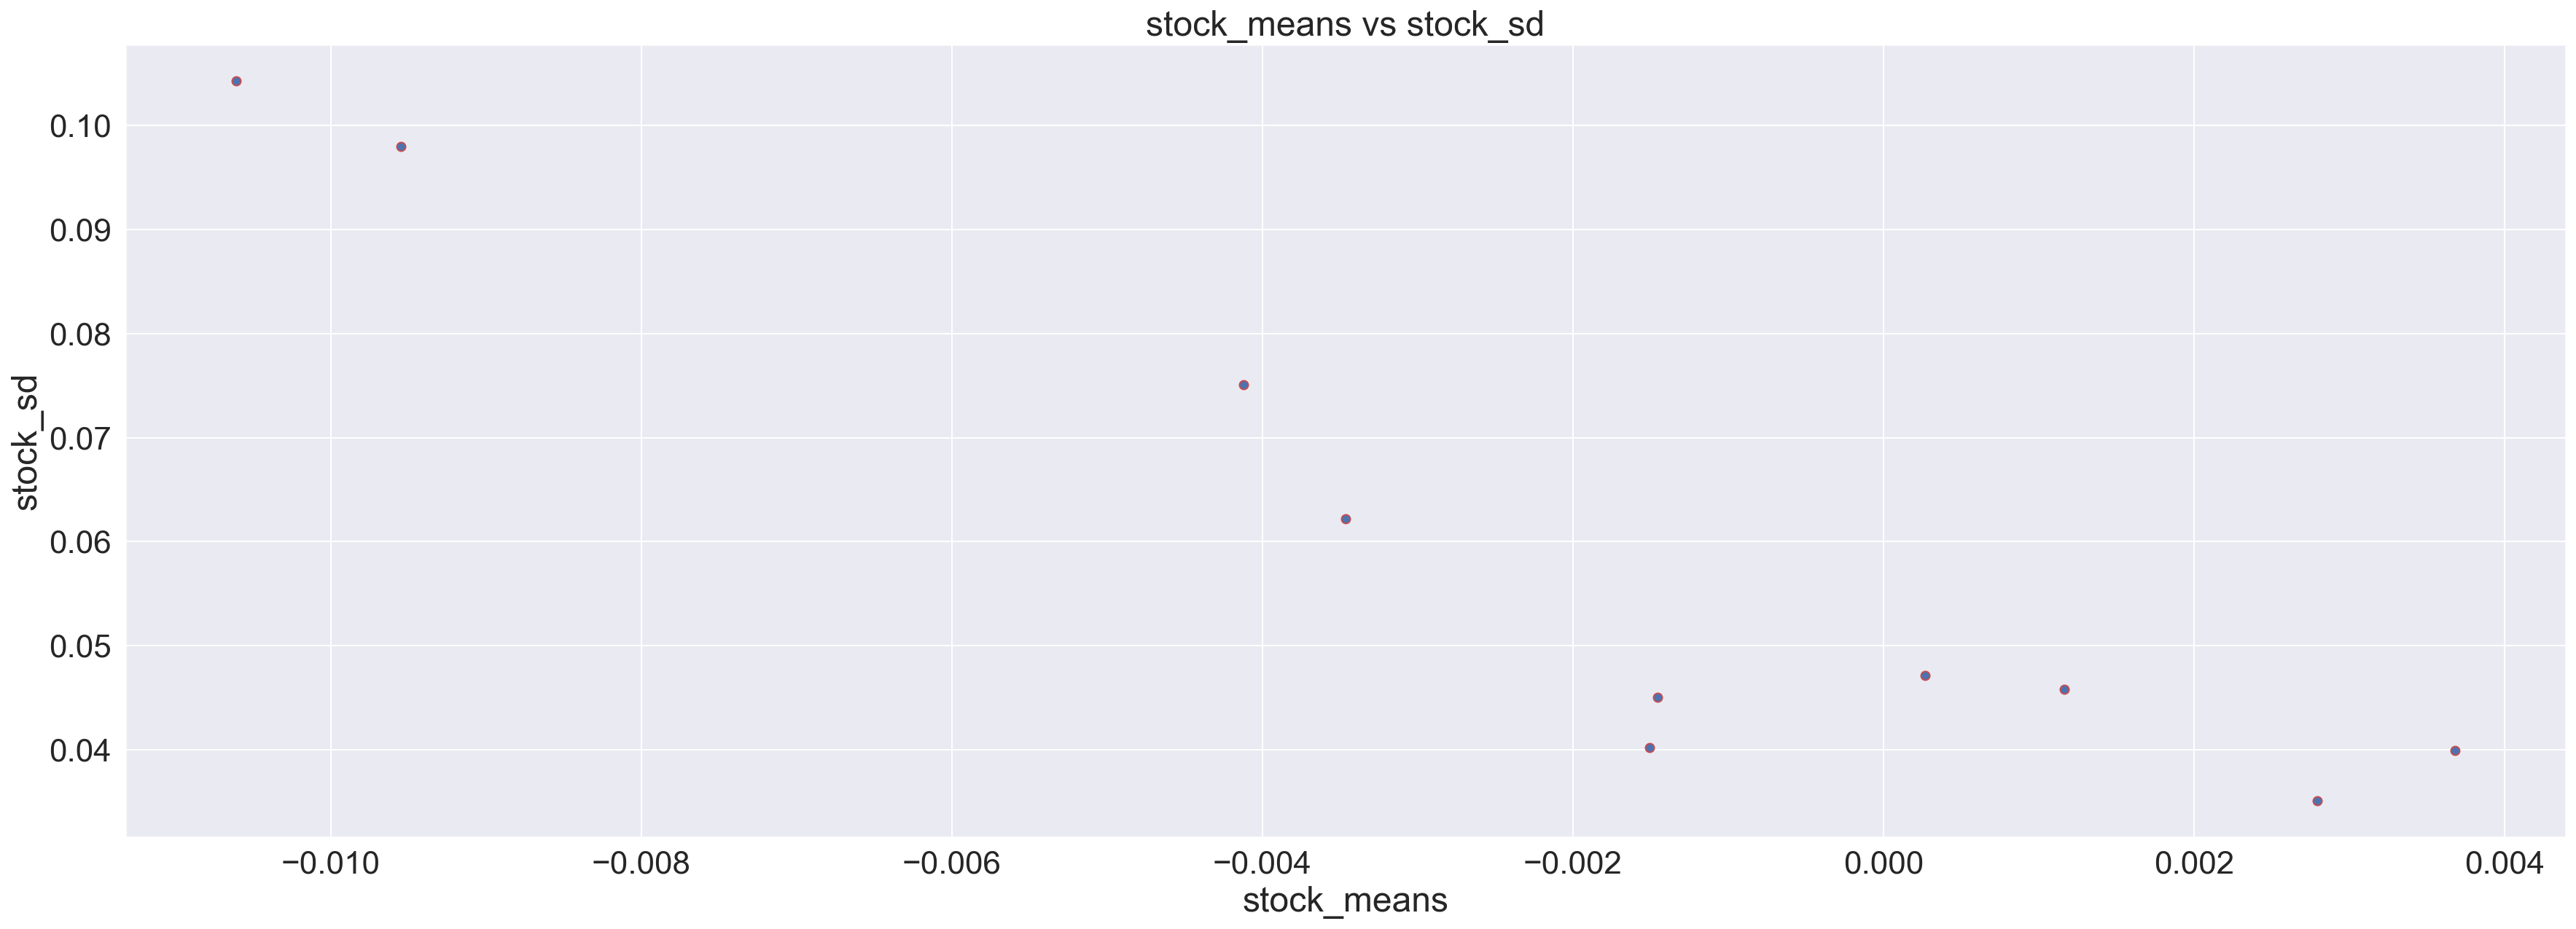

In [129]:
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()

In [ ]:
Stock with a lower mean & higher standard deviation do not play a role in a portfolio that has competing stock with more returns & less risk. Thus for the data we have here, we are only left few stocks:

One with highest return and lowest risk &
One with lowest risk and highest return

In [133]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df.sort_values(by=['Average'],ascending=False)

Average  Volatility
Shree_Cement         0.003681    0.039917
Infosys              0.002794    0.035070
Axis_Bank            0.001167    0.045828
Indian_Hotel         0.000266    0.047131
Sun_Pharma          -0.001455    0.045033
Mahindra_&_Mahindra -0.001506    0.040169
SAIL                -0.003463    0.062188
Jindal_Steel        -0.004123    0.075108
Jet_Airways         -0.009548    0.097972
Idea_Vodafone       -0.010608    0.104315

In [135]:
#Calculating Stock Standard Deviation as Volatility
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd}) 
df.sort_values(by=['Volatility'],ascending=False)


Average  Volatility
Idea_Vodafone       -0.010608    0.104315
Jet_Airways         -0.009548    0.097972
Jindal_Steel        -0.004123    0.075108
SAIL                -0.003463    0.062188
Indian_Hotel         0.000266    0.047131
Axis_Bank            0.001167    0.045828
Sun_Pharma          -0.001455    0.045033
Mahindra_&_Mahindra -0.001506    0.040169
Shree_Cement         0.003681    0.039917
Infosys              0.002794    0.035070